In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
df_train = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\application_train.csv')

In [3]:
df_train = df_train[df_train['SK_ID_CURR'] <=216091]
df_train.shape

(100001, 122)

In [4]:
df_train = pd.get_dummies(df_train)
df_train.shape

(100001, 246)

In [5]:
bureau = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\bureau.csv')

In [6]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [7]:
bureau_dummies = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']]
bureau_numeric = bureau[['SK_ID_CURR', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']]

In [8]:
bureau1 = bureau[['SK_ID_CURR']]
bureau1 = bureau1.drop_duplicates('SK_ID_CURR')
bureau1 = pd.DataFrame(bureau1)
bureau1.shape

(305811, 1)

In [9]:
def grouper(w, x, z):
    y = x.groupby('SK_ID_CURR', as_index=False)[z].mean()
    df_train2 = pd.concat([w, y[z]], axis=1)
    return df_train2

In [10]:
days_credit = grouper(bureau1, bureau, 'DAYS_CREDIT')
credit_day_overdue = grouper(bureau1, bureau, 'CREDIT_DAY_OVERDUE')
days_credit_enddate = grouper(bureau1, bureau, 'DAYS_CREDIT_ENDDATE')
days_enddate_fact = grouper(bureau1, bureau, 'DAYS_ENDDATE_FACT')
amt_credit_maxoverdue = grouper(bureau1, bureau, 'AMT_CREDIT_MAX_OVERDUE')
cnt_credit_prolong = grouper(bureau1, bureau, 'CNT_CREDIT_PROLONG')
amt_credit_sum = grouper(bureau1, bureau, 'AMT_CREDIT_SUM')
amt_credit_sum_debt = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_DEBT')
amt_credit_sum_limit = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_LIMIT')
amt_credit_sum_overdue = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_OVERDUE')
days_credit_update = grouper(bureau1, bureau, 'DAYS_CREDIT_UPDATE')
amt_annuity = grouper(bureau1, bureau, 'AMT_ANNUITY')
amt_annuity.shape

(539751, 2)

In [11]:
df_train = pd.merge(df_train, days_credit, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, credit_day_overdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_credit_enddate, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_enddate_fact, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_maxoverdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, cnt_credit_prolong, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_debt, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_limit, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_overdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_credit_update, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_annuity, how='left', on = 'SK_ID_CURR')

In [12]:
df_train.shape

(100001, 258)

In [16]:
def dummies(x, z):
    y = x.drop_duplicates(z)
    y = pd.get_dummies(y)
    return y

In [17]:
bureau_dummies = dummies(bureau_dummies, 'SK_ID_CURR')
bureau_dummies.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,...,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,162297,5714469,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13,402440,5714475,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14,238881,5714482,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,222183,5714491,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
bureau_dummies.shape

(305811, 22)

In [19]:
df_train = pd.merge(df_train, bureau_dummies, how='left', on='SK_ID_CURR')
df_train.shape

(100001, 279)

In [20]:
bb = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\bureau_balance.csv')
bb.shape

(27299925, 3)

In [21]:
bb_status = dummies(bb, 'SK_ID_BUREAU')
bb_status.shape

(817395, 10)

In [22]:
df_train = pd.merge(df_train, bb_status, how='left', on='SK_ID_BUREAU')
df_train.shape

(100001, 288)

In [23]:
def grouper1(x, z):
    y = x.groupby('SK_ID_BUREAU', as_index=False)[z].mean()
    return y

In [24]:
bb_months_balance = grouper1(bb, 'MONTHS_BALANCE')
bb_months_balance.shape

(817395, 2)

In [25]:
df_train = pd.merge(df_train, bb_months_balance, how='left', on='SK_ID_BUREAU')
df_train.shape

(100001, 289)

In [22]:
#The next sheet we will look at is POS_Cash

In [26]:
pc = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\POS_CASH_balance.csv')
pc.shape

(10001358, 8)

In [27]:
pc.columns.values
#It looks like there is only 1 column in this set that we will need to make dummy columns for
#The rest are all numeric

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [28]:
pc_df = pc[['SK_ID_CURR']]
pc_df = pc.drop_duplicates('SK_ID_CURR')
pc_df.shape

(337252, 8)

In [29]:
def grouper1(x, z):
    y = x.groupby('SK_ID_CURR', as_index=False)[z].mean()
    return y

In [30]:
months_balance = grouper1(pc, 'MONTHS_BALANCE')
cnt_instalment = grouper1(pc, 'CNT_INSTALMENT')
cnt_instalment_future = grouper1(pc, 'CNT_INSTALMENT_FUTURE')
sk_dpd = grouper1(pc, 'SK_DPD')
sk_dpd_def = grouper1(pc, 'SK_DPD_DEF')
months_balance.shape

(337252, 2)

In [31]:
months_balance = months_balance[['SK_ID_CURR', 'MONTHS_BALANCE']]
cnt_instalment = cnt_instalment[['SK_ID_CURR', 'CNT_INSTALMENT']]
cnt_instalment_future = cnt_instalment_future[['SK_ID_CURR', 'CNT_INSTALMENT_FUTURE']]
sk_dpd = sk_dpd[['SK_ID_CURR', 'SK_DPD']]
sk_dpd_def = sk_dpd_def[['SK_ID_CURR', 'SK_DPD_DEF']]
months_balance.shape

(337252, 2)

In [32]:
months_balance.columns.values

array(['SK_ID_CURR', 'MONTHS_BALANCE'], dtype=object)

In [33]:
df_train = pd.merge(df_train, months_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment_future, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sk_dpd, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sk_dpd_def, how='left', on='SK_ID_CURR')
df_train.shape

(100001, 294)

In [34]:
pc_dummies = pc[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]
pc_dummies = dummies(pc_dummies, 'SK_ID_CURR')
df_train = pd.merge(df_train, pc_dummies, how='left', on='SK_ID_CURR')

In [35]:
df_train.shape

(100001, 301)

In [36]:
#The next sheet we will look at is credit_card_balance
cc = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\credit_card_balance.csv')

In [37]:
cc.columns.values
#It looks like there is only one column that we will need to create dummy columns for

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [38]:
cc_dummies = cc[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]
cc_dummies = dummies(cc_dummies, 'SK_ID_CURR')
cc_dummies.shape

(103558, 6)

In [39]:
df_train = pd.merge(df_train, cc_dummies, how='left', on='SK_ID_CURR')

In [40]:
df_train.shape

(100001, 306)

In [41]:
cc_df = cc[['SK_ID_CURR']]
cc_df=  cc_df.drop_duplicates('SK_ID_CURR')
cc_df = pd.DataFrame(cc_df)
cc_df.shape

(103558, 1)

In [42]:
months_balance = grouper1(cc, 'MONTHS_BALANCE')
amt_balance = grouper1(cc, 'AMT_BALANCE')
amt_credit_limit_actual = grouper1(cc, 'AMT_CREDIT_LIMIT_ACTUAL')
amt_drawings_atm_current = grouper1(cc, 'AMT_DRAWINGS_ATM_CURRENT')
amt_drawings_current = grouper1(cc, 'AMT_DRAWINGS_CURRENT')
amt_drawings_other_current = grouper1(cc, 'AMT_DRAWINGS_OTHER_CURRENT')
amt_drawings_pos_current = grouper1(cc, 'AMT_DRAWINGS_POS_CURRENT')
amt_inst_min_regularity = grouper1(cc, 'AMT_INST_MIN_REGULARITY')
amt_payment_current = grouper1(cc, 'AMT_PAYMENT_CURRENT')
amt_payment_total_current = grouper1(cc, 'AMT_PAYMENT_TOTAL_CURRENT')
amt_receivable_principal = grouper1(cc, 'AMT_RECEIVABLE_PRINCIPAL')
amt_receivable = grouper1(cc, 'AMT_RECIVABLE')
amt_total_receivable = grouper1(cc, 'AMT_TOTAL_RECEIVABLE')
cnt_drawings_atm_current = grouper1(cc, 'CNT_DRAWINGS_ATM_CURRENT')
cnt_drawings_current = grouper1(cc, 'CNT_DRAWINGS_ATM_CURRENT')
cnt_drawings_other_current = grouper1(cc, 'CNT_DRAWINGS_OTHER_CURRENT')
cnt_drawings_pos_current = grouper1(cc, 'CNT_DRAWINGS_POS_CURRENT')
cnt_instalment_mature_cum = grouper1(cc, 'CNT_INSTALMENT_MATURE_CUM')
months_balance.shape

(103558, 2)

In [43]:
months_balance.columns.values

array(['SK_ID_CURR', 'MONTHS_BALANCE'], dtype=object)

In [44]:
df_train = pd.merge(df_train, months_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_limit_actual, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_atm_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_other_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_pos_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_inst_min_regularity, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment_total_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_receivable_principal, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_receivable, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_atm_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_other_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_pos_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment_mature_cum, how='left', on='SK_ID_CURR')

In [45]:
df_train.shape

(100001, 323)

In [46]:
pa = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\previous_application.csv')
pa.shape

(1670214, 37)

In [47]:
pa.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [48]:
def dummies(x, z):
    y = x.drop_duplicates(z)
    y = pd.get_dummies(y)
    return y

In [49]:
pa_dummies = pa[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
                'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
                'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 
                'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]
pa_dummies = dummies(pa_dummies, 'SK_ID_CURR')
pa_dummies.shape

(338857, 143)

In [50]:
df_train = pd.merge(df_train, pa_dummies, how= 'left', on='SK_ID_CURR')

In [51]:
df_train.shape

(100001, 465)

In [52]:
pa_df = pa[['SK_ID_CURR']]
pa_df = pa.drop_duplicates('SK_ID_CURR')
pa_df = pd.DataFrame(pa_df)

In [53]:
amt_annuity = grouper1(pa, 'AMT_ANNUITY')
amt_application = grouper1(pa, 'AMT_APPLICATION')
amt_credit = grouper1(pa, 'AMT_CREDIT')
amt_down_payment = grouper1(pa, 'AMT_DOWN_PAYMENT')
amt_goods_price = grouper1(pa, 'AMT_GOODS_PRICE')
hour_appr_process_start = grouper1(pa, 'HOUR_APPR_PROCESS_START')
rate_down_payment = grouper1(pa, 'RATE_DOWN_PAYMENT')
rate_interest_primary = grouper1(pa, 'RATE_INTEREST_PRIMARY')
rate_interest_privileged = grouper1(pa, 'RATE_INTEREST_PRIVILEGED')
days_decision = grouper1(pa, 'DAYS_DECISION')
sellerplace_area = grouper1(pa, 'SELLERPLACE_AREA')
cnt_payment = grouper1(pa, 'CNT_PAYMENT')
days_first_drawing = grouper1(pa, 'DAYS_FIRST_DRAWING')
days_first_due = grouper1(pa, 'DAYS_FIRST_DUE')
days_last_due_1st_version = grouper1(pa, 'DAYS_LAST_DUE_1ST_VERSION')
days_last_due = grouper1(pa, 'DAYS_LAST_DUE')
days_termination = grouper1(pa, 'DAYS_TERMINATION')
nflag_insured_on_approval = grouper1(pa, 'NFLAG_INSURED_ON_APPROVAL')
amt_annuity.shape

(338857, 2)

In [54]:
df_train = pd.merge(df_train, amt_annuity, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_application, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_down_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_goods_price, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, hour_appr_process_start, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_down_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_interest_primary, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_interest_privileged, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_decision, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sellerplace_area, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_first_drawing, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_first_due, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_last_due_1st_version, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_last_due, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_termination, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, nflag_insured_on_approval, how='left', on='SK_ID_CURR')

In [55]:
df_train.shape

(100001, 483)

In [56]:
#The last sheet we will look at is installments_payments
ip = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\installments_payments.csv')
ip.shape

(13605401, 8)

In [57]:
ip.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [58]:
num_instalment_version = grouper1(ip, 'NUM_INSTALMENT_VERSION')
num_instalment_number = grouper1(ip, 'NUM_INSTALMENT_NUMBER')
days_instalment = grouper1(ip, 'DAYS_INSTALMENT')
days_entry_payment = grouper1(ip, 'DAYS_ENTRY_PAYMENT')
amt_payment = grouper1(ip, 'AMT_PAYMENT')
amt_instalment = grouper1(ip, 'AMT_INSTALMENT')
days_instalment.shape

(339587, 2)

In [59]:
num_instalment_version = num_instalment_version[['SK_ID_CURR', 'NUM_INSTALMENT_VERSION']]
num_instalment_number = num_instalment_number[['SK_ID_CURR', 'NUM_INSTALMENT_NUMBER']]
days_instalment = days_instalment[['SK_ID_CURR', 'DAYS_INSTALMENT']]
days_entry_payment = days_entry_payment[['SK_ID_CURR', 'DAYS_ENTRY_PAYMENT']]
amt_payment = amt_payment[['SK_ID_CURR', 'AMT_PAYMENT']]
amt_instalment = amt_instalment[['SK_ID_CURR', 'AMT_INSTALMENT']]

In [60]:
df_train = pd.merge(df_train, num_instalment_version, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, num_instalment_number, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_entry_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment, how='left', on='SK_ID_CURR')

In [61]:
df_train.shape

(100001, 489)

In [2]:
df_train.to_csv('C:\\Users\\tilleymusprime\\Desktop\\df_train_clean.csv')

NameError: name 'df_train' is not defined

In [8]:
df_train.columns.values

array(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',

In [ ]:
#Now that we have put all of the data together in one dataframe, we will continue the cleaning process.
#We will first go through each column and create a histogram so we can get a general idea of the data
#After that, we will fill in missing values for each column
#Finally, we will do some statistical analysis by comparing each chart against target to see if any particular categories 
#stand out for our future model.

In [2]:
df_train = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\df_train_clean.csv')

In [3]:
def hist_maker(w, x, y, z):
    plt.hist(x, bins = w)
    plt.xlabel(y)
    plt.ylabel('Count')
    plt.title(z)
    plt.show()

In [67]:
#Now that we have our plotting formulas set, we will use weight of evidence to determine what variables are most important
#We will also check the information value of the data as well.  This will allow us to see what variables are important
#It will also reduce the number of columns in the data frame.  In this situation, we will keep all variables between 
#0.02 and 0.5. The rest will either be considered unrelated or too good to be true
# The code for this is available at https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

In [68]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [69]:
final_iv, IV = data_vars(df_train, df_train.TARGET)

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [7]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Unnamed: 0,0.000000,3.333300e+04,33334,2682.0,0.080458,30652.0,0.919542,0.331398,0.333507,-0.006347,0.000046
1,Unnamed: 0,33334.000000,6.666600e+04,33333,2690.0,0.080701,30643.0,0.919299,0.332386,0.333409,-0.003074,0.000046
2,Unnamed: 0,66667.000000,1.000000e+05,33334,2721.0,0.081628,30613.0,0.918372,0.336216,0.333083,0.009363,0.000046
3,SK_ID_CURR,100002.000000,1.386200e+05,33334,2682.0,0.080458,30652.0,0.919542,0.331398,0.333507,-0.006347,0.000046
4,SK_ID_CURR,138621.000000,1.773060e+05,33333,2690.0,0.080701,30643.0,0.919299,0.332386,0.333409,-0.003074,0.000046
5,SK_ID_CURR,177307.000000,2.160910e+05,33334,2721.0,0.081628,30613.0,0.918372,0.336216,0.333083,0.009363,0.000046
6,CNT_CHILDREN,0.000000,1.000000e+00,89992,7222.0,0.080252,82770.0,0.919748,0.892376,0.900574,-0.009145,0.000725
7,CNT_CHILDREN,2.000000,1.200000e+01,10009,871.0,0.087022,9138.0,0.912978,0.107624,0.099426,0.079234,0.000725
8,AMT_INCOME_TOTAL,25650.000000,1.170000e+05,33532,2853.0,0.085083,30679.0,0.914917,0.352527,0.333801,0.054581,0.007440
9,AMT_INCOME_TOTAL,117130.500000,1.800000e+05,36608,3112.0,0.085009,33496.0,0.914991,0.384530,0.364451,0.053628,0.007440


In [8]:
IV.sort_values('IV')

,VAR_NAME,IV
247,NAME_FAMILY_STATUS_Unknown,1.183847e-10
128,FLAG_DOCUMENT_12,1.183847e-10
150,FLAG_MOBIL,1.183847e-10
284,NAME_INCOME_TYPE_Maternity leave,1.183847e-10
126,FLAG_DOCUMENT_10,4.735415e-10
61,CODE_GENDER_XNA,1.065474e-09
282,NAME_INCOME_TYPE_Businessman,1.894187e-09
287,NAME_INCOME_TYPE_Student,9.589581e-09
140,FLAG_DOCUMENT_4,2.320505e-08
409,ORGANIZATION_TYPE_Trade: type 4,2.320505e-08


In [4]:
#Based on the above data, we will use all columns with a score between 0.02 and 0.7
df_train = df_train[['SK_ID_CURR', 'SK_ID_BUREAU', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
                    'NAME_EDUCATION_TYPE_Higher education', 'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
                    'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 
                    'NAME_INCOME_TYPE_Working', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION', 'TOTALAREA_MODE',
                    'FLOORSMAX_MODE', 'CODE_GENDER_M', 'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
                    'NAME_EDUCATION_TYPE_Secondary / secondary special', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
                    'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH', 'YEARS_BEGINEXPLUATATION_MEDI',
                    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG', 'AMT_INST_MIN_REGULARITY',
                    'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT', 'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYMENT',
                    'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
                    'CNT_DRAWINGS_POS_CURRENT', 'FLAG_EMP_PHONE', 'EMERGENCYSTATE_MODE_No', 'REGION_RATING_CLIENT_W_CITY',
                    'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'HOUSETYPE_MODE_block of flats', 'FLAG_DOCUMENT_3',
                    'SELLERPLACE_AREA', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'NONLIVINGAREA_AVG',
                    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 
                    'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG', 'OCCUPATION_TYPE_Laborers', 'FLOORSMIN_AVG',
                    'BASEMENTAREA_MEDI', 'OWN_CAR_AGE', 'FLOORSMIN_MODE', 'BASEMENTAREA_MODE', 'HOUR_APPR_PROCESS_START_y',
                    'AMT_INSTALMENT', 'MONTHS_BALANCE_x.1', 'CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
                    'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']]

In [5]:
#Here we will set up two dataframes for our bar plots.  The first is for the accounts with no payment problems.
#The second is for accounts with payment problems.
#When we are comparing the payment problem and non payment problem columns we will use two separate histograms instead of
#graphing them on the same chart.  This is due to the size difference of each sample.  When they are on they same plot,
#it can be hard to the success0 data set
success1 = df_train[df_train['TARGET'] == 1]
success0 = df_train[df_train['TARGET'] == 0]

In [6]:
#The first column we will look at is TARGET
#This column indicates if the client had payment difficulties
#Since this column is all 1 and 0, we will just need to check for missing values
#Since this column is the dependent variable, hopefully it will not having any missing values
df_train['TARGET'].isnull().sum()

0

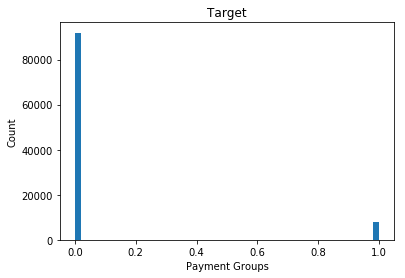

In [7]:
hist_maker(50, df_train['TARGET'], 'Payment Groups', 'Target')

In [8]:
df_train.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'TARGET', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
       'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE',
       'AMT_RECEIVABLE_PRINCIPAL', 'NAME_INCOME_TYPE_Working',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION',
       'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
       'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG',
       'AMT_INST_MIN_REGULARITY', 'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT',
       'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYME

In [9]:
#The next column we will look at is EXT_SOURCE_3.
#This is external data
df_train['EXT_SOURCE_3'].isnull().sum()
#It looks like there are quite a few missing values in this source.  Let's create histogram and see how we should fill the data

19827

In [10]:
df_train['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

In [11]:
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(0.7463)
success1['EXT_SOURCE_3'] = success1['EXT_SOURCE_3'].fillna(0.7463)
success0['EXT_SOURCE_3'] = success0['EXT_SOURCE_3'].fillna(0.7463)

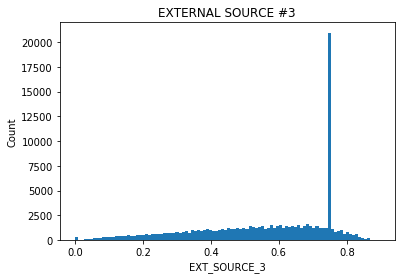

In [12]:
hist_maker(100, df_train['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'EXTERNAL SOURCE #3')

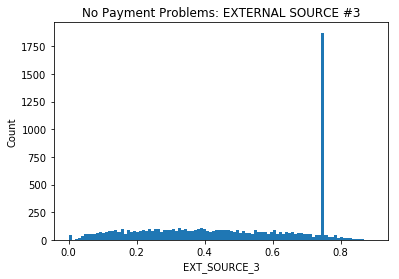

In [13]:
hist_maker(100, success1['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'No Payment Problems: EXTERNAL SOURCE #3')

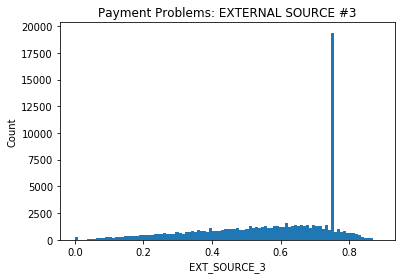

In [14]:
hist_maker(100, success0['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'Payment Problems: EXTERNAL SOURCE #3')

In [15]:
#the next column we will look at is EXT_SOURCE_2.
#This is another externdal data source
df_train['EXT_SOURCE_2'].isnull().sum()

215

In [16]:
df_train['EXT_SOURCE_2'].mode()

0    0.285898
dtype: float64

In [17]:
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(0.28598)
success1['EXT_SOURCE_2'] = success1['EXT_SOURCE_2'].fillna(0.28598)
success0['EXT_SOURCE_2'] = success0['EXT_SOURCE_2'].fillna(0.28598)

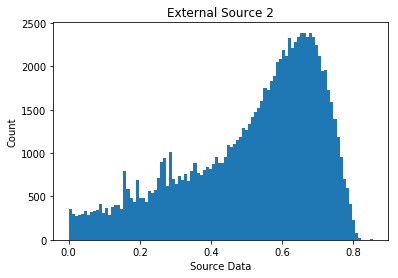

In [18]:
hist_maker(100, df_train['EXT_SOURCE_2'], 'Source Data', 'External Source 2')

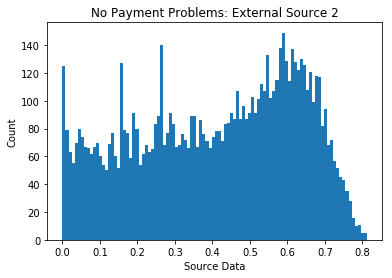

In [19]:
hist_maker(100, success1['EXT_SOURCE_2'], 'Source Data', 'No Payment Problems: External Source 2')

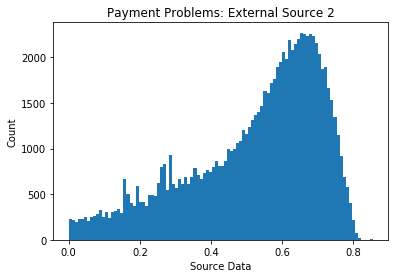

In [20]:
hist_maker(100, success0['EXT_SOURCE_2'], 'Source Data', 'Payment Problems: External Source 2')

In [21]:
#The next column we will look at is EXT_SOURCE_1
#This is another external data source
df_train['EXT_SOURCE_1'].isnull().sum()

56284

In [22]:
df_train['EXT_SOURCE_1'].median()

0.5077102623707801

In [23]:
df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(.5077)
success1['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(.5077)
success0['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(.5077)

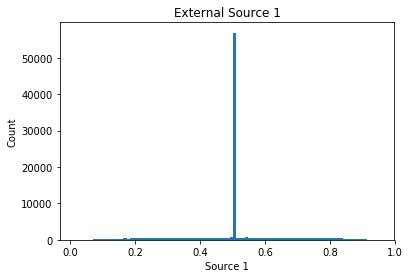

In [24]:
hist_maker(100, df_train['EXT_SOURCE_1'], 'Source 1', 'External Source 1')

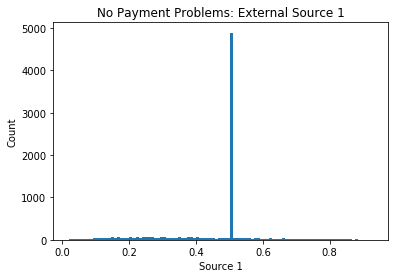

In [25]:
hist_maker(100, success1['EXT_SOURCE_1'], 'Source 1', 'No Payment Problems: External Source 1')

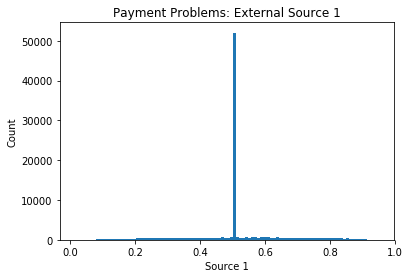

In [26]:
hist_maker(100, success0['EXT_SOURCE_1'], 'Source 1', 'Payment Problems: External Source 1')

In [27]:
#The next column we will look at is days_birth
#This column indicates the age of the applicant
df_train['DAYS_BIRTH'].isnull().sum()

0

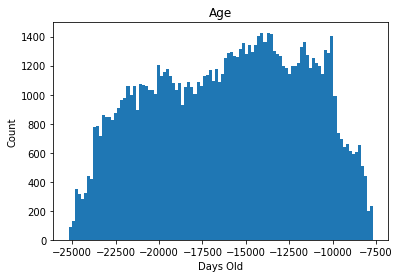

In [28]:
hist_maker(100, df_train['DAYS_BIRTH'], 'Days Old', 'Age')

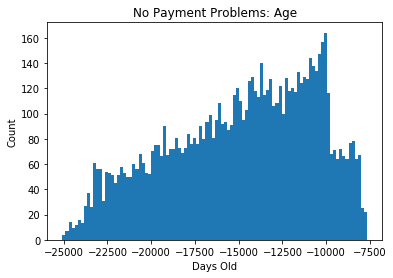

In [29]:
hist_maker(100, success1['DAYS_BIRTH'], 'Days Old', 'No Payment Problems: Age')

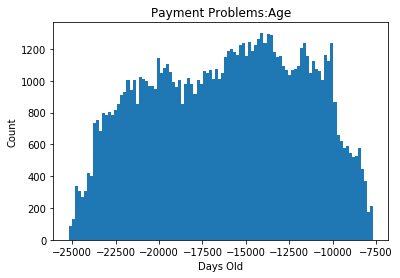

In [30]:
hist_maker(100, success0['DAYS_BIRTH'], 'Days Old', 'Payment Problems:Age')
#It looks like older people have more payment problems than younger people

In [31]:
#The next column we will look at is NAME_EDUCATION_TYPE_Higher education
#This column indicates whether or not an applicant has higher credit
df_train['NAME_EDUCATION_TYPE_Higher education'].isnull().sum()

0

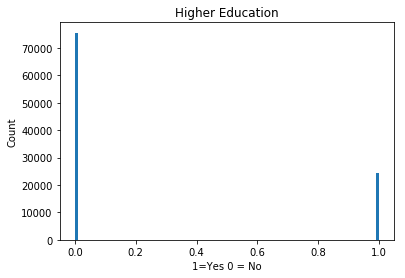

In [32]:
hist_maker(100, df_train['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'Higher Education')

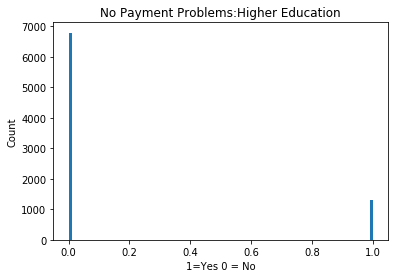

In [33]:
hist_maker(100, success1['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'No Payment Problems:Higher Education')

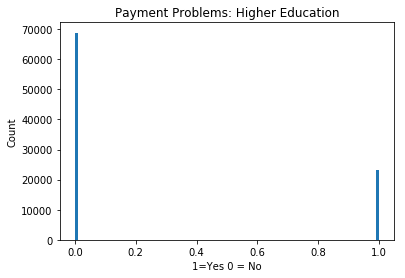

In [34]:
hist_maker(100, success0['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'Payment Problems: Higher Education')

In [35]:
#The next column we will look at is CNT_DRAWINGS_ATM_CURRENT_x
#This column indicates the current atm drawings from the training data set
df_train['CNT_DRAWINGS_ATM_CURRENT_x'].isnull().sum()

80334

In [36]:
df_train['CNT_DRAWINGS_ATM_CURRENT_x'] = df_train['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)
success1['CNT_DRAWINGS_ATM_CURRENT_x'] = success1['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)
success0['CNT_DRAWINGS_ATM_CURRENT_x'] = success0['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)

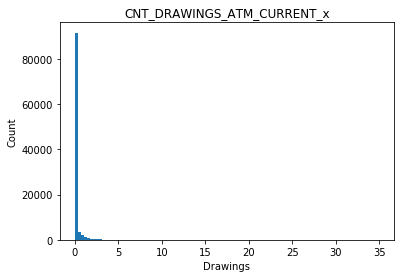

In [37]:
hist_maker(100, df_train['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'CNT_DRAWINGS_ATM_CURRENT_x')

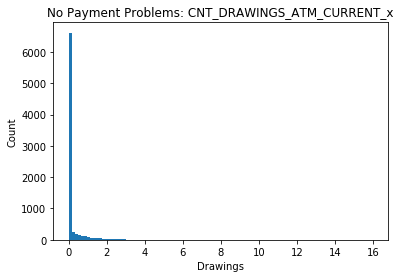

In [38]:
hist_maker(100, success1['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'No Payment Problems: CNT_DRAWINGS_ATM_CURRENT_x')

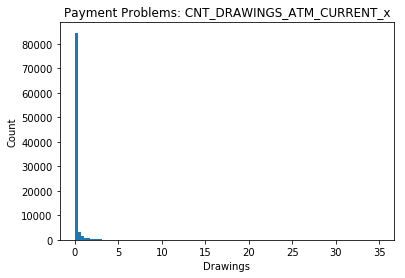

In [39]:
hist_maker(100, success0['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'Payment Problems: CNT_DRAWINGS_ATM_CURRENT_x')

In [40]:
#The next column we will look at is CNT_DRAWINGS_ATM_CURRENT_y
#This column indicates the amount of atm drawings from the creditcard balance datasheet
df_train['CNT_DRAWINGS_ATM_CURRENT_y'].isnull().sum()

80334

In [41]:
df_train['CNT_DRAWINGS_ATM_CURRENT_y'] = df_train['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)
success1['CNT_DRAWINGS_ATM_CURRENT_y'] = success1['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)
success0['CNT_DRAWINGS_ATM_CURRENT_y'] = success0['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)

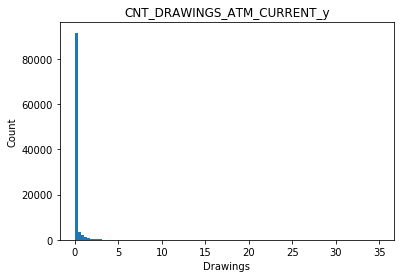

In [42]:
hist_maker(100, df_train['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'CNT_DRAWINGS_ATM_CURRENT_y')

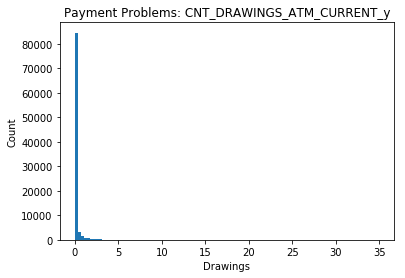

In [43]:
hist_maker(100, success0['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'Payment Problems: CNT_DRAWINGS_ATM_CURRENT_y')

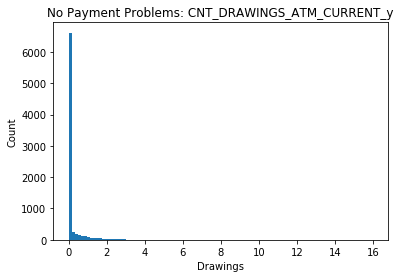

In [44]:
hist_maker(100, success1['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'No Payment Problems: CNT_DRAWINGS_ATM_CURRENT_y')

In [45]:
#The next column we will look at is AMT_DRAWINGS_CURRENT
#This column indicates the current drawings from the credit card balance sheet
df_train['AMT_DRAWINGS_CURRENT'].isnull().sum()

71781

In [46]:
df_train['AMT_DRAWINGS_CURRENT'] = df_train['AMT_DRAWINGS_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_CURRENT'] = success1['AMT_DRAWINGS_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_CURRENT'] = success0['AMT_DRAWINGS_CURRENT'].fillna(0)

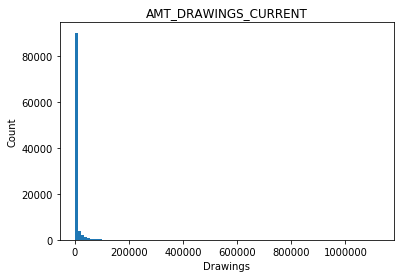

In [47]:
hist_maker(100, df_train['AMT_DRAWINGS_CURRENT'], 'Drawings', 'AMT_DRAWINGS_CURRENT')

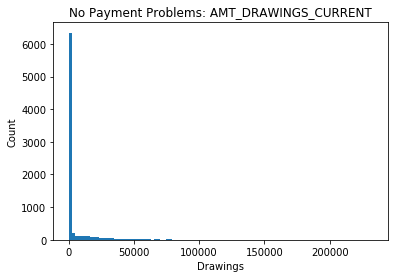

In [48]:
hist_maker(100, success1['AMT_DRAWINGS_CURRENT'], 'Drawings', 'No Payment Problems: AMT_DRAWINGS_CURRENT')

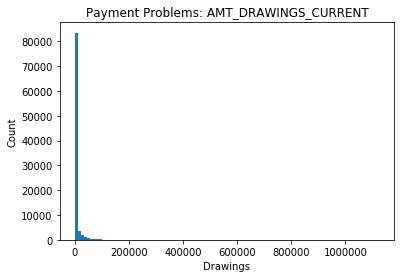

In [49]:
hist_maker(100, success0['AMT_DRAWINGS_CURRENT'], 'Drawings', 'Payment Problems: AMT_DRAWINGS_CURRENT')

In [50]:
#The next column we will look at is AMT_BALANCE
#This column indicates the credit card balance amount in the credit card balance column.
df_train['AMT_BALANCE'].isnull().sum()

71781

In [51]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_BALANCE'] = df_train['AMT_BALANCE'].fillna(0)
success1['AMT_BALANCE'] = success1['AMT_BALANCE'].fillna(0)
success0['AMT_BALANCE'] = success0['AMT_BALANCE'].fillna(0)

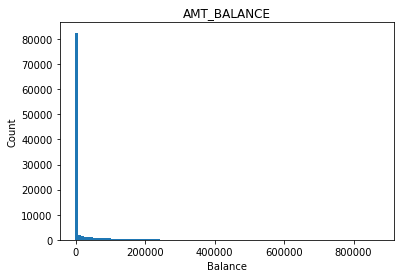

In [52]:
hist_maker(100, df_train['AMT_BALANCE'], 'Balance', 'AMT_BALANCE')

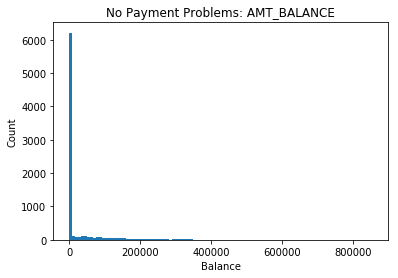

In [53]:
hist_maker(100, success1['AMT_BALANCE'], 'Balance', 'No Payment Problems: AMT_BALANCE')

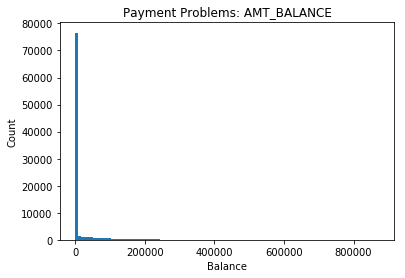

In [54]:
hist_maker(100, success0['AMT_BALANCE'], 'Balance', 'Payment Problems: AMT_BALANCE')

In [55]:
#The next column we will look at is AMT_RECIVABLE
#This is from the credit card balance sheet
#It indicates the amount recievable on the previous credit
df_train['AMT_RECIVABLE'].isnull().sum()

71781

In [56]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_RECIVABLE'] = df_train['AMT_RECIVABLE'].fillna(0)
success1['AMT_RECIVABLE'] = success1['AMT_RECIVABLE'].fillna(0)
success0['AMT_RECIVABLE'] = success0['AMT_RECIVABLE'].fillna(0)

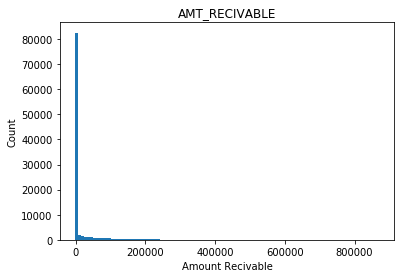

In [57]:
hist_maker(100, df_train['AMT_RECIVABLE'], 'Amount Recivable', 'AMT_RECIVABLE')

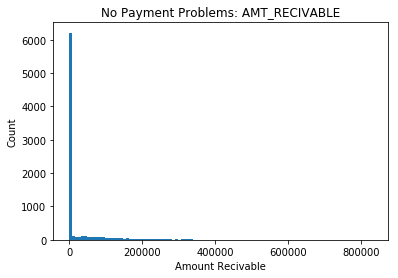

In [58]:
hist_maker(100, success1['AMT_RECIVABLE'], 'Amount Recivable', 'No Payment Problems: AMT_RECIVABLE')

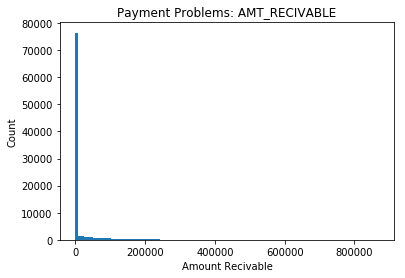

In [59]:
hist_maker(100, success0['AMT_RECIVABLE'], 'Amount Recivable', 'Payment Problems: AMT_RECIVABLE')

In [60]:
#The next column we will look at is AMT_RECEIVABLE_PRINCIPAL
#this column indicates the amount of principal received on the last credit
#This comes from the credit card balance column.
df_train['AMT_RECEIVABLE_PRINCIPAL'].isnull().sum()

71781

In [61]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_RECEIVABLE_PRINCIPAL'] = df_train['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)
success1['AMT_RECEIVABLE_PRINCIPAL'] = success1['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)
success0['AMT_RECEIVABLE_PRINCIPAL'] = success0['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)

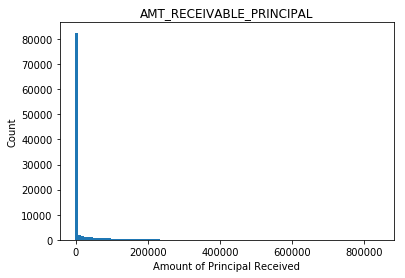

In [62]:
hist_maker(100, df_train['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'AMT_RECEIVABLE_PRINCIPAL')

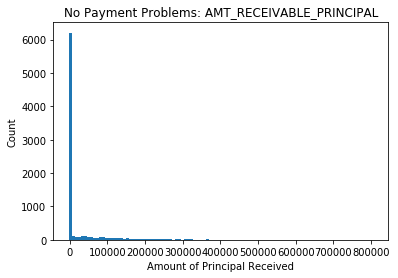

In [63]:
hist_maker(100, success1['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'No Payment Problems: AMT_RECEIVABLE_PRINCIPAL')

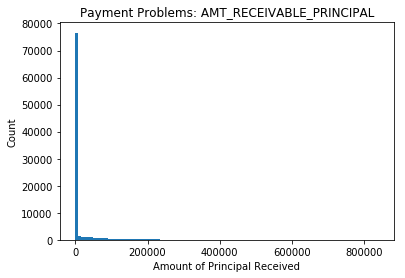

In [64]:
hist_maker(100, success0['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'Payment Problems: AMT_RECEIVABLE_PRINCIPAL')

In [65]:
# The next column we will look at is NAME_INCOME_TYPE_Working
#This column describes if the applicant's income comes from working or not
df_train['NAME_INCOME_TYPE_Working'].isnull().sum()

0

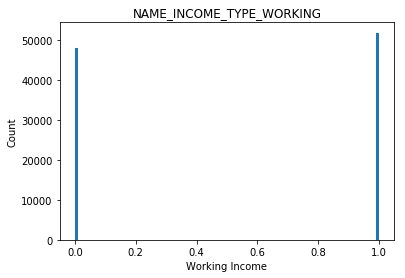

In [66]:
hist_maker(100, df_train['NAME_INCOME_TYPE_Working'], 'Working Income', 'NAME_INCOME_TYPE_WORKING')

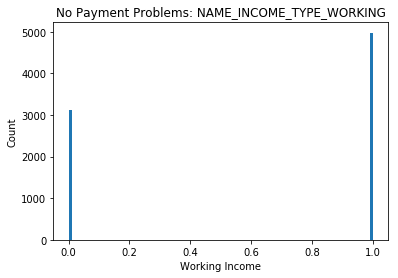

In [67]:
hist_maker(100, success1['NAME_INCOME_TYPE_Working'], 'Working Income', 'No Payment Problems: NAME_INCOME_TYPE_WORKING')

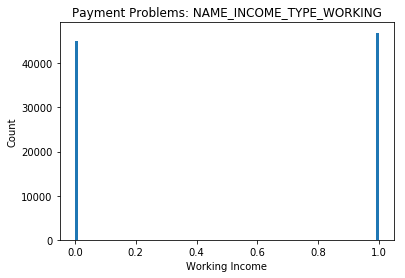

In [68]:
hist_maker(100, success0['NAME_INCOME_TYPE_Working'], 'Working Income', 'Payment Problems: NAME_INCOME_TYPE_WORKING')

In [69]:
#The next column we will look at is FLOORSMAX_AVG
#This column indicates the maximum average number of floors
df_train['FLOORSMAX_AVG'].isnull().sum()

49688

In [70]:
df_train['FLOORSMAX_AVG'] = df_train['FLOORSMAX_AVG'].fillna(0)
success1['FLOORSMAX_AVG'] = success1['FLOORSMAX_AVG'].fillna(0)
success0['FLOORSMAX_AVG'] = success0['FLOORSMAX_AVG'].fillna(0)

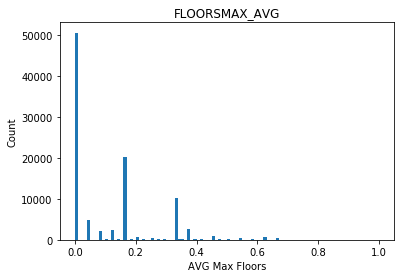

In [71]:
hist_maker(100, df_train['FLOORSMAX_AVG'], 'AVG Max Floors', 'FLOORSMAX_AVG')

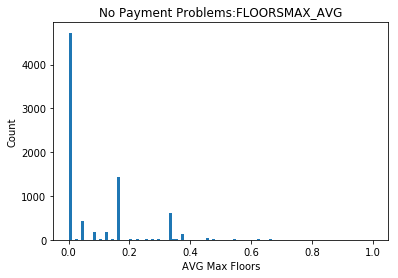

In [72]:
hist_maker(100, success1['FLOORSMAX_AVG'], 'AVG Max Floors', 'No Payment Problems:FLOORSMAX_AVG')

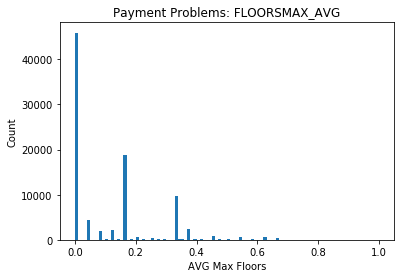

In [73]:
hist_maker(100, success0['FLOORSMAX_AVG'], 'AVG Max Floors', 'Payment Problems: FLOORSMAX_AVG')

In [74]:
#The next column we will look at is FLOORSMAX_MEDI
#This column indicates the maximum floors median
df_train['FLOORSMAX_MEDI'].isnull().sum()

49688

In [75]:
df_train['FLOORSMAX_MEDI'] = df_train['FLOORSMAX_MEDI'].fillna(0)
success1['FLOORSMAX_MEDI'] = success1['FLOORSMAX_MEDI'].fillna(0)
success0['FLOORSMAX_MEDI'] = success0['FLOORSMAX_MEDI'].fillna(0)

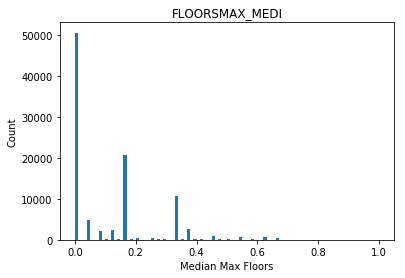

In [76]:
hist_maker(100, df_train['FLOORSMAX_MEDI'], 'Median Max Floors', 'FLOORSMAX_MEDI')

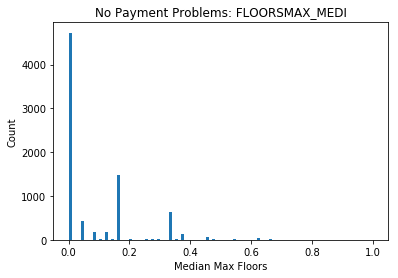

In [77]:
hist_maker(100, success1['FLOORSMAX_MEDI'], 'Median Max Floors', 'No Payment Problems: FLOORSMAX_MEDI')

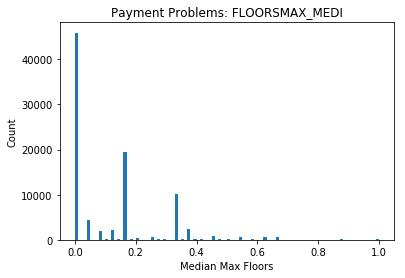

In [78]:
hist_maker(100, success0['FLOORSMAX_MEDI'], 'Median Max Floors', 'Payment Problems: FLOORSMAX_MEDI')

In [79]:
#The next column we will look at is DAYS_DECISION
#This column is relative to the number of days it took to do the last application
#This column comes from the previous applicaiton sheet
df_train['DAYS_DECISION'].isnull().sum()

5346

In [80]:
df_train['DAYS_DECISION'] = df_train['DAYS_DECISION'].fillna(0)
success1['DAYS_DECISION'] = success1['DAYS_DECISION'].fillna(0)
success0['DAYS_DECISION'] = success0['DAYS_DECISION'].fillna(0)

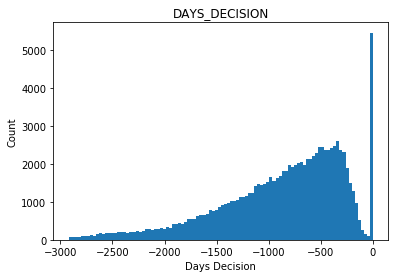

In [81]:
hist_maker(100, df_train['DAYS_DECISION'], 'Days Decision', 'DAYS_DECISION')

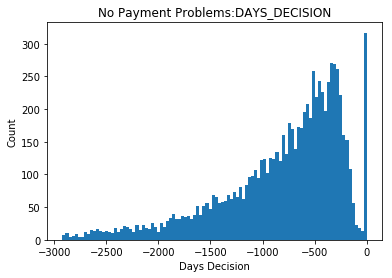

In [82]:
hist_maker(100, success1['DAYS_DECISION'], 'Days Decision', 'No Payment Problems:DAYS_DECISION')

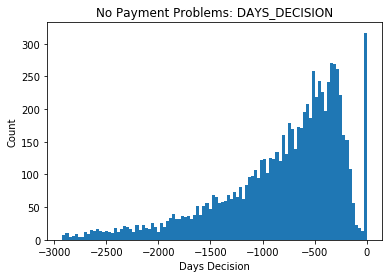

In [83]:
hist_maker(100, success1['DAYS_DECISION'], 'Days Decision', 'No Payment Problems: DAYS_DECISION')

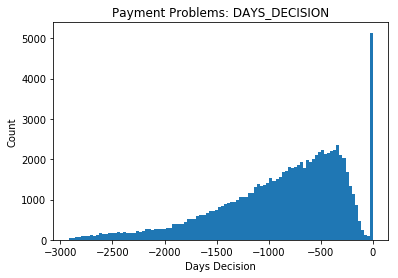

In [84]:
hist_maker(100, success0['DAYS_DECISION'], 'Days Decision', 'Payment Problems: DAYS_DECISION')

In [85]:
#The next column we will look at is TOTALAREA_MODE.
#This column indicates the mode of the total area of the units and is from the original training sheet
df_train['TOTALAREA_MODE'].isnull().sum()

48223

In [86]:
df_train['TOTALAREA_MODE'] = df_train['TOTALAREA_MODE'].fillna(0)
success1['TOTALAREA_MODE'] = success1['TOTALAREA_MODE'].fillna(0)
success0['TOTALAREA_MODE'] = success0['TOTALAREA_MODE'].fillna(0)

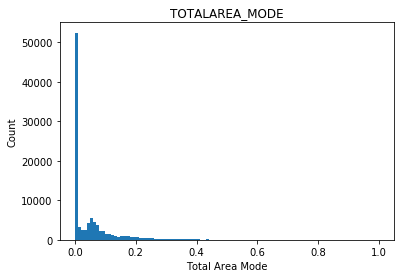

In [87]:
hist_maker(100, df_train['TOTALAREA_MODE'], 'Total Area Mode', 'TOTALAREA_MODE')

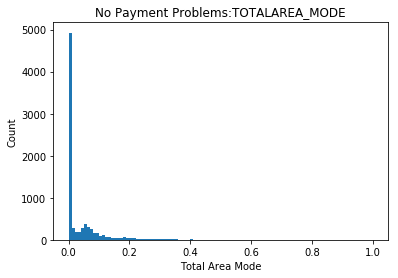

In [88]:
hist_maker(100, success1['TOTALAREA_MODE'], 'Total Area Mode', 'No Payment Problems:TOTALAREA_MODE')

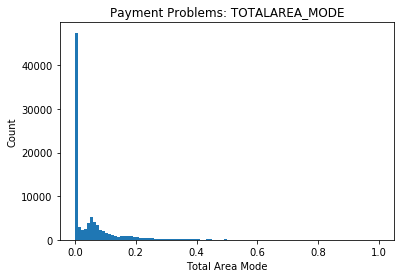

In [89]:
hist_maker(100, success0['TOTALAREA_MODE'], 'Total Area Mode', 'Payment Problems: TOTALAREA_MODE')

In [90]:
#The next column we will look at is FLOORSMAX_MODE
#This column indicates the mode of the max # of floors
#It is from the df_train sheet
df_train['FLOORSMAX_MODE'].isnull().sum()

49688

In [91]:
df_train['FLOORSMAX_MODE'] = df_train['FLOORSMAX_MODE'].fillna(0)
success1['FLOORSMAX_MODE'] = success1['FLOORSMAX_MODE'].fillna(0)
success0['FLOORSMAX_MODE'] = success0['FLOORSMAX_MODE'].fillna(0)

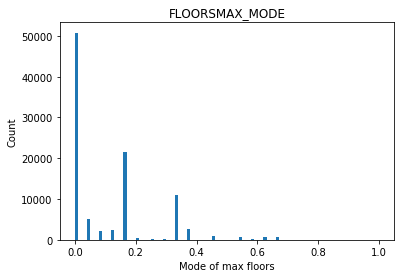

In [92]:
hist_maker(100, df_train['FLOORSMAX_MODE'], 'Mode of max floors', 'FLOORSMAX_MODE')

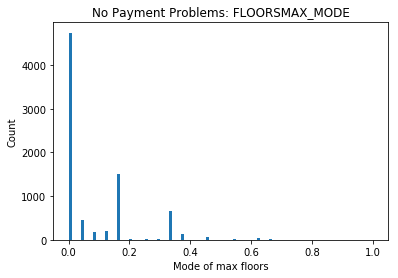

In [93]:
hist_maker(100, success1['FLOORSMAX_MODE'], 'Mode of max floors', 'No Payment Problems: FLOORSMAX_MODE')

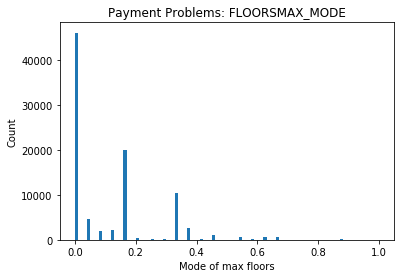

In [94]:
hist_maker(100, success0['FLOORSMAX_MODE'], 'Mode of max floors', 'Payment Problems: FLOORSMAX_MODE')

In [95]:
#The next column we will look at is CODE_GENDER_M
#This column indicates if the gender of the applicant is male
df_train['CODE_GENDER_M'].isnull().sum()

0

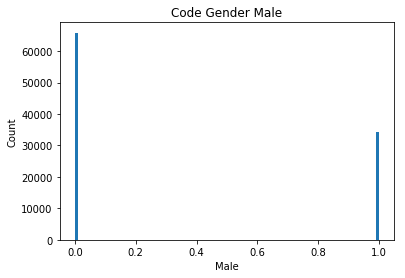

In [96]:
hist_maker(100, df_train['CODE_GENDER_M'], 'Male', 'Code Gender Male')

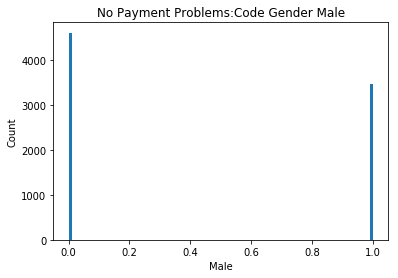

In [97]:
hist_maker(100, success1['CODE_GENDER_M'], 'Male', 'No Payment Problems:Code Gender Male')

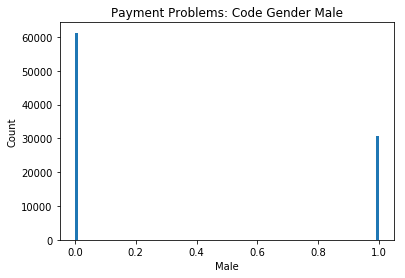

In [98]:
hist_maker(100, success0['CODE_GENDER_M'], 'Male', 'Payment Problems: Code Gender Male')

In [99]:
#The next column we will look at is CODE_GENDER_F
#This column indicates if the gender of the applicant is female
df_train['CODE_GENDER_F'].isnull().sum()

0

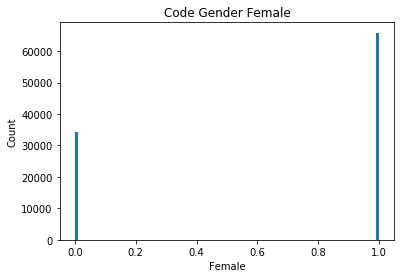

In [100]:
hist_maker(100, df_train['CODE_GENDER_F'], 'Female', 'Code Gender Female')

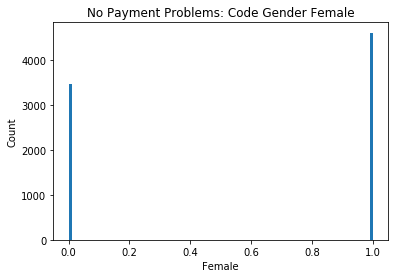

In [101]:
hist_maker(100, success1['CODE_GENDER_F'], 'Female', 'No Payment Problems: Code Gender Female')

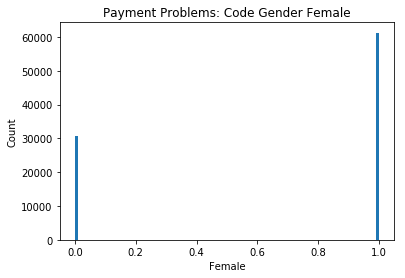

In [102]:
hist_maker(100, success0['CODE_GENDER_F'], 'Female', 'Payment Problems: Code Gender Female')

In [103]:
#The next column we will look at is DAYS_LAST_PHONE_CHANGE
#This column indicates the days since the client last changed phone numbers
df_train['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [104]:
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].fillna(0)
success1['DAYS_LAST_PHONE_CHANGE'] = success1['DAYS_LAST_PHONE_CHANGE'].fillna(0)
success0['DAYS_LAST_PHONE_CHANGE'] = success0['DAYS_LAST_PHONE_CHANGE'].fillna(0)

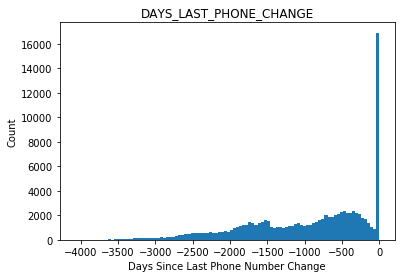

In [105]:
hist_maker(100, df_train['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'DAYS_LAST_PHONE_CHANGE')

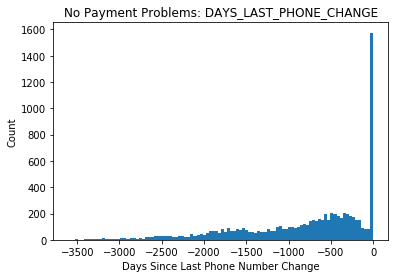

In [106]:
hist_maker(100, success1['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'No Payment Problems: DAYS_LAST_PHONE_CHANGE')

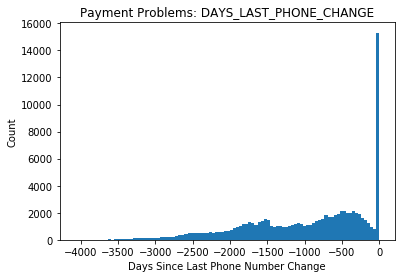

In [107]:
hist_maker(100, success0['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'Payment Problems: DAYS_LAST_PHONE_CHANGE')

In [108]:
#The next column we will look at is DAYS_ENTRY_PAYMENT
#This column indicates when the insallments of previous credit were paid relative to the contract.
#This column originally comes from the installments_payments sheet
df_train['DAYS_ENTRY_PAYMENT'].isnull().sum()

5146

In [109]:
df_train['DAYS_ENTRY_PAYMENT'] = df_train['DAYS_ENTRY_PAYMENT'].fillna(0)
success1['DAYS_ENTRY_PAYMENT'] = success1['DAYS_ENTRY_PAYMENT'].fillna(0)
success0['DAYS_ENTRY_PAYMENT'] = success0['DAYS_ENTRY_PAYMENT'].fillna(0)

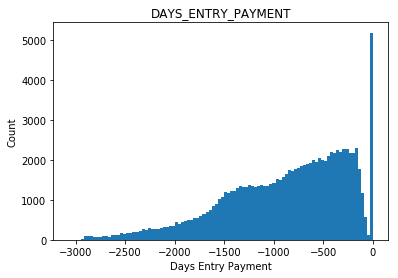

In [110]:
hist_maker(100, df_train['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'DAYS_ENTRY_PAYMENT')

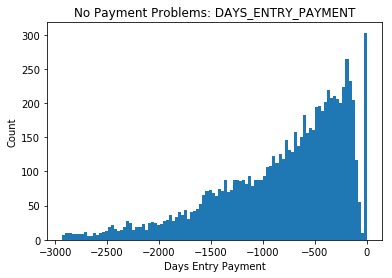

In [111]:
hist_maker(100, success1['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'No Payment Problems: DAYS_ENTRY_PAYMENT')

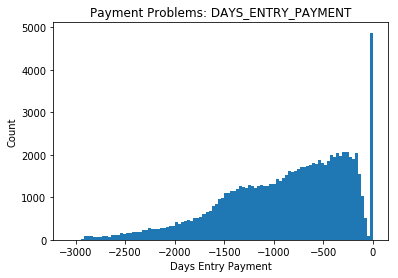

In [112]:
hist_maker(100, success0['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'Payment Problems: DAYS_ENTRY_PAYMENT')

In [113]:
#The next column we will look at is NAME_EDUCATION_TYPE_Secondary / secondary special
#This column indicates if an applicant has acheived secondary education or not
df_train['NAME_EDUCATION_TYPE_Secondary / secondary special'].isnull().sum()

0

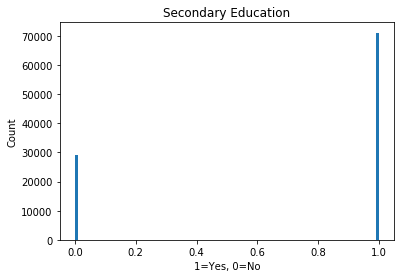

In [114]:
hist_maker(100, df_train['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'Secondary Education')

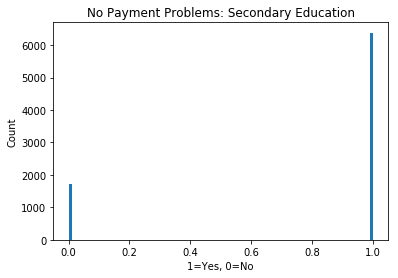

In [115]:
hist_maker(100, success1['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'No Payment Problems: Secondary Education')

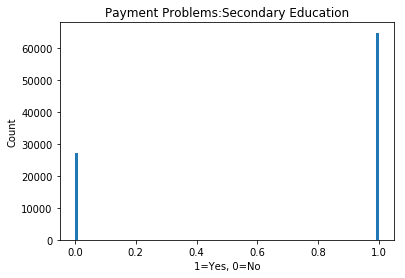

In [116]:
hist_maker(100, success0['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'Payment Problems:Secondary Education')

In [117]:
#The next column we will look at is LIVINGAREA_MEDI
#This column indicates the median living area
df_train['LIVINGAREA_MEDI'].isnull().sum()

50151

In [118]:
df_train['LIVINGAREA_MEDI'] = df_train['LIVINGAREA_MEDI'].fillna(0)
success1['LIVINGAREA_MEDI'] = success1['LIVINGAREA_MEDI'].fillna(0)
success0['LIVINGAREA_MEDI'] = success0['LIVINGAREA_MEDI'].fillna(0)

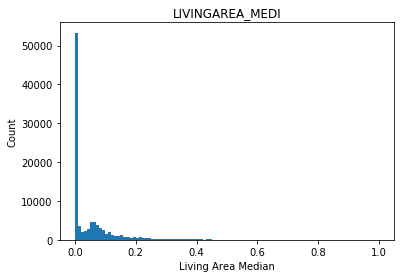

In [119]:
hist_maker(100, df_train['LIVINGAREA_MEDI'], 'Living Area Median', 'LIVINGAREA_MEDI')

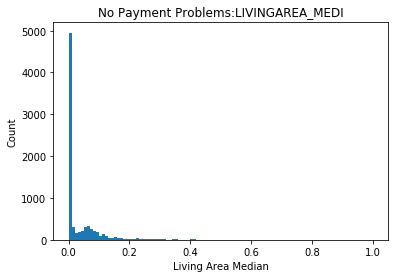

In [120]:
hist_maker(100, success1['LIVINGAREA_MEDI'], 'Living Area Median', 'No Payment Problems:LIVINGAREA_MEDI')

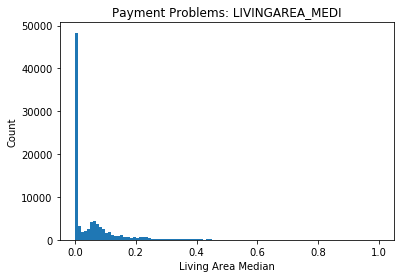

In [121]:
hist_maker(100, success0['LIVINGAREA_MEDI'], 'Living Area Median', 'Payment Problems: LIVINGAREA_MEDI')

In [122]:
#The next column we will look at is LIVINGAREA_AVG
#This column indicates the average living area
df_train['LIVINGAREA_MEDI'].isnull().sum()

0

In [123]:
df_train['LIVINGAREA_AVG'] = df_train['LIVINGAREA_AVG'].fillna(0)
success1['LIVINGAREA_AVG'] = success1['LIVINGAREA_AVG'].fillna(0)
success0['LIVINGAREA_AVG'] = success0['LIVINGAREA_AVG'].fillna(0)

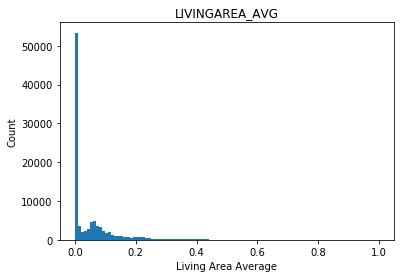

In [124]:
hist_maker(100, df_train['LIVINGAREA_AVG'], 'Living Area Average', 'LIVINGAREA_AVG')

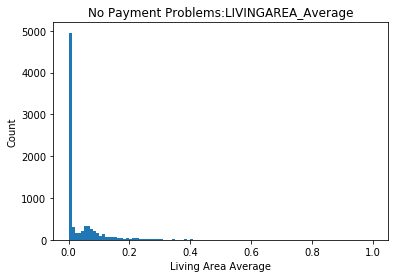

In [125]:
hist_maker(100, success1['LIVINGAREA_AVG'], 'Living Area Average', 'No Payment Problems:LIVINGAREA_Average')

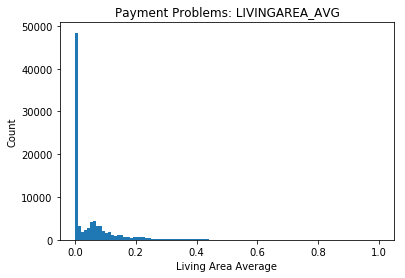

In [126]:
hist_maker(100, success0['LIVINGAREA_AVG'], 'Living Area Average', 'Payment Problems: LIVINGAREA_AVG')

In [127]:
#The next column we will look at is DAYS_INSTALMENT
#This column indicates when the installment was actually paid relative to when it was supposed to be paid
#This is from the installments payments sections
df_train['DAYS_INSTALMENT'].isnull().sum()

5145

In [128]:
df_train['DAYS_INSTALMENT'] = df_train['DAYS_INSTALMENT'].fillna(0)
success1['DAYS_INSTALMENT'] = success1['DAYS_INSTALMENT'].fillna(0)
success0['DAYS_INSTALMENT'] = success0['DAYS_INSTALMENT'].fillna(0)

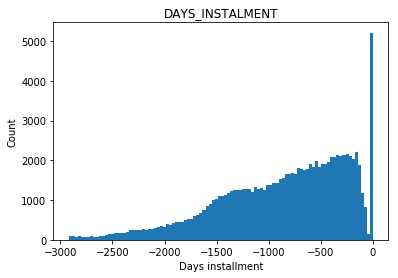

In [129]:
hist_maker(100, df_train['DAYS_INSTALMENT'], 'Days installment', 'DAYS_INSTALMENT')

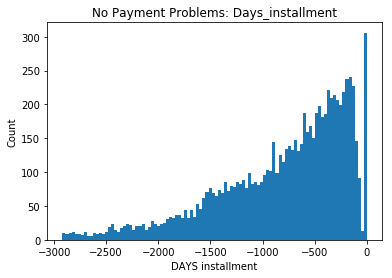

In [130]:
hist_maker(100, success1['DAYS_INSTALMENT'], 'DAYS installment', 'No Payment Problems: Days_installment')

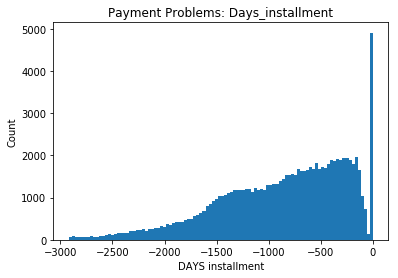

In [131]:
hist_maker(100, success0['DAYS_INSTALMENT'], 'DAYS installment', 'Payment Problems: Days_installment')

In [132]:
#The next column we will look at is AMT_DRAWINGS_ATM_CURRENT
#This column indicates the amount of drawings from ATM
df_train['AMT_DRAWINGS_ATM_CURRENT'].isnull().sum()

80334

In [133]:
df_train['AMT_DRAWINGS_ATM_CURRENT'] = df_train['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_ATM_CURRENT'] = success1['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_ATM_CURRENT'] = success0['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)

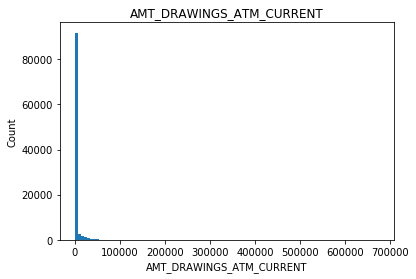

In [134]:
hist_maker(100, df_train['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT')

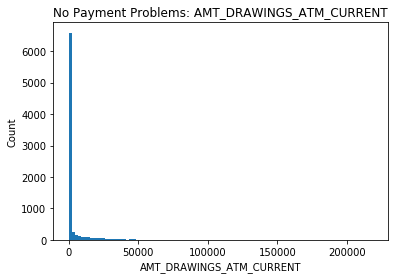

In [135]:
hist_maker(100, success1['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'No Payment Problems: AMT_DRAWINGS_ATM_CURRENT')

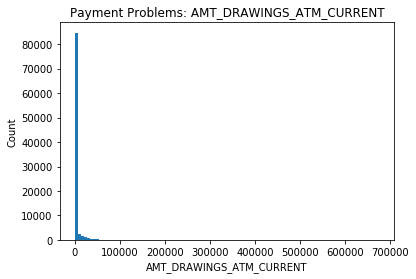

In [136]:
hist_maker(100, success0['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'Payment Problems: AMT_DRAWINGS_ATM_CURRENT')

In [137]:
#The next column we will look at is LIVINGAREA_MODE
#This column indicates the mode of living areas
df_train['LIVINGAREA_MODE'].isnull().sum()

50151

In [138]:
df_train['LIVINGAREA_MODE'] = df_train['LIVINGAREA_MODE'].fillna(0)
success1['LIVINGAREA_MODE'] = success1['LIVINGAREA_MODE'].fillna(0)
success0['LIVINGAREA_MODE'] = success0['LIVINGAREA_MODE'].fillna(0)

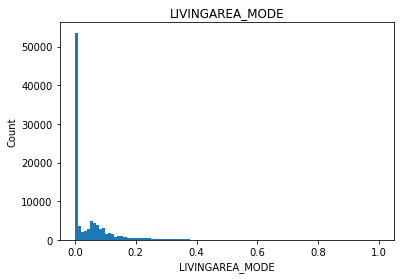

In [139]:
hist_maker(100, df_train['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'LIVINGAREA_MODE')

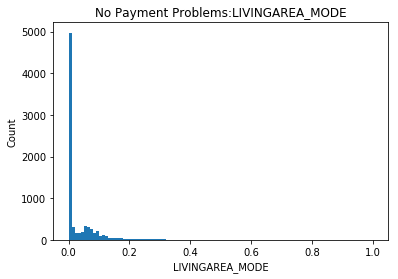

In [140]:
hist_maker(100, success1['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'No Payment Problems:LIVINGAREA_MODE')

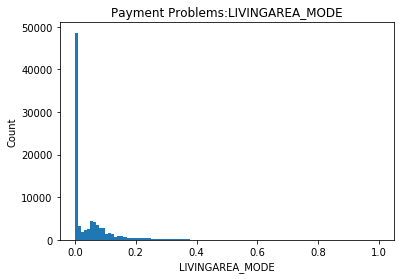

In [141]:
hist_maker(100, success0['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'Payment Problems:LIVINGAREA_MODE')

In [142]:
#The next column we will look at is DAYS_ID_PUBLISH
#This column indicates how many days before the application the client changed the identity document
df_train['DAYS_ID_PUBLISH'].isnull().sum()

0

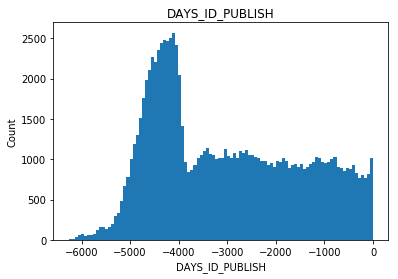

In [143]:
hist_maker(100, df_train['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'DAYS_ID_PUBLISH')

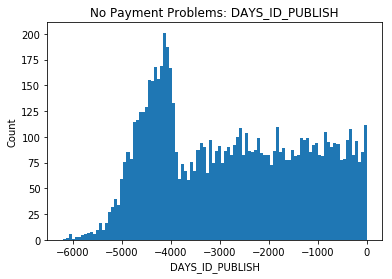

In [144]:
hist_maker(100, success1['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'No Payment Problems: DAYS_ID_PUBLISH')

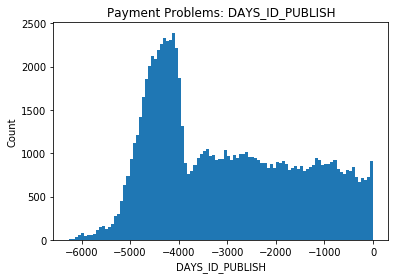

In [145]:
hist_maker(100, success0['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'Payment Problems: DAYS_ID_PUBLISH')

In [146]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_MEDI
df_train['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

48701

In [147]:
df_train['YEARS_BEGINEXPLUATATION_MEDI'] = df_train['YEARS_BEGINEXPLUATATION_MEDI'].fillna(1)
success1['YEARS_BEGINEXPLUATATION_MEDI'] = success1['YEARS_BEGINEXPLUATATION_MEDI'].fillna(1)
success0['YEARS_BEGINEXPLUATATION_MEDI'] = success0['YEARS_BEGINEXPLUATATION_MEDI'].fillna(1)

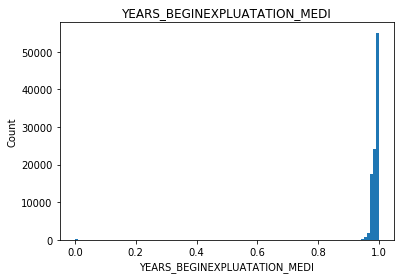

In [148]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI')

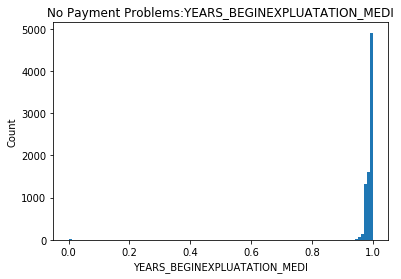

In [149]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'No Payment Problems:YEARS_BEGINEXPLUATATION_MEDI')

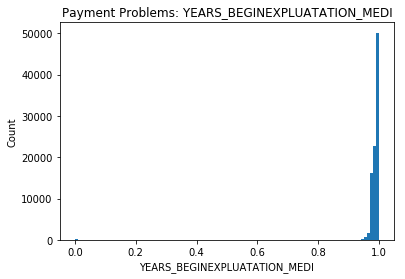

In [150]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'Payment Problems: YEARS_BEGINEXPLUATATION_MEDI')

In [151]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_AVG
df_train['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

48701

In [152]:
df_train['YEARS_BEGINEXPLUATATION_AVG'] = df_train['YEARS_BEGINEXPLUATATION_AVG'].fillna(1)
success1['YEARS_BEGINEXPLUATATION_AVG'] = success1['YEARS_BEGINEXPLUATATION_AVG'].fillna(1)
success0['YEARS_BEGINEXPLUATATION_AVG'] = success0['YEARS_BEGINEXPLUATATION_AVG'].fillna(1)

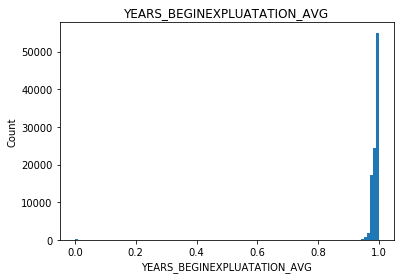

In [153]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_AVG')

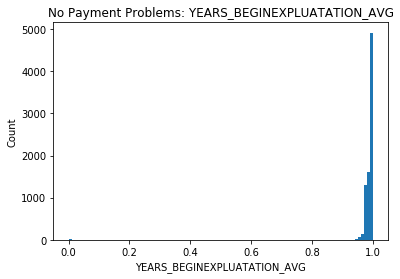

In [154]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'No Payment Problems: YEARS_BEGINEXPLUATATION_AVG')

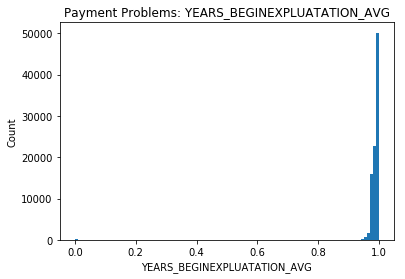

In [155]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'Payment Problems: YEARS_BEGINEXPLUATATION_AVG')

In [156]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_MODE
df_train['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

48701

In [157]:
df_train['YEARS_BEGINEXPLUATATION_MODE'] = df_train['YEARS_BEGINEXPLUATATION_MODE'].fillna(1)
success1['YEARS_BEGINEXPLUATATION_MODE'] = success1['YEARS_BEGINEXPLUATATION_MODE'].fillna(1)
success0['YEARS_BEGINEXPLUATATION_MODE'] = success0['YEARS_BEGINEXPLUATATION_MODE'].fillna(1)

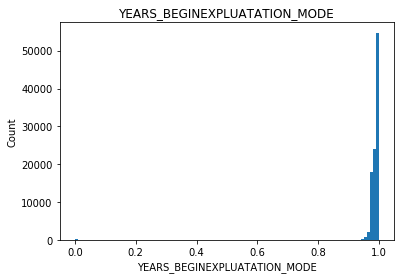

In [158]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MODE')

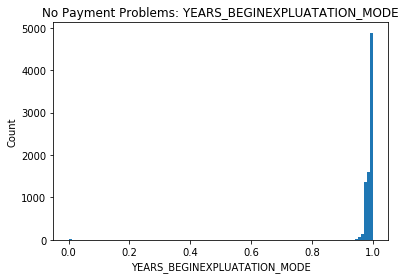

In [159]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'No Payment Problems: YEARS_BEGINEXPLUATATION_MODE')

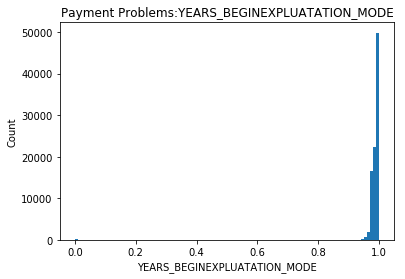

In [160]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'Payment Problems:YEARS_BEGINEXPLUATATION_MODE')

In [161]:
#The next column we will look at is Apartments Average
#This column indicates inofmration about how many apartments are in the area
df_train['APARTMENTS_AVG'].isnull().sum()

50682

In [162]:
df_train['APARTMENTS_AVG'] = df_train['APARTMENTS_AVG'].fillna(1)
success1['APARTMENTS_AVG'] = success1['APARTMENTS_AVG'].fillna(1)
success0['APARTMENTS_AVG'] = success0['APARTMENTS_AVG'].fillna(1)

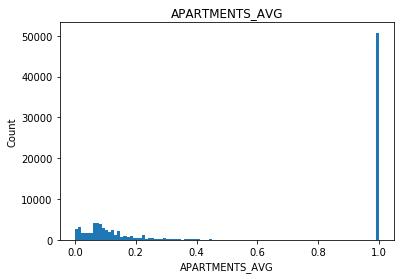

In [163]:
hist_maker(100, df_train['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'APARTMENTS_AVG')

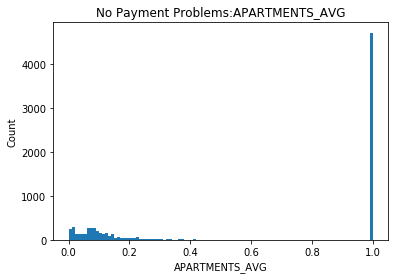

In [164]:
hist_maker(100, success1['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'No Payment Problems:APARTMENTS_AVG')

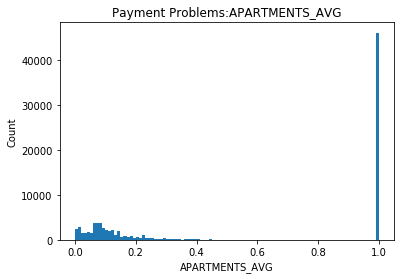

In [165]:
hist_maker(100, success0['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'Payment Problems:APARTMENTS_AVG')

In [166]:
#The next column we will look at is AMT_INST_MIN_REGULARITY
df_train['AMT_INST_MIN_REGULARITY'].isnull().sum()

71781

In [167]:
df_train['AMT_INST_MIN_REGULARITY'] = df_train['AMT_INST_MIN_REGULARITY'].fillna(0)
success1['AMT_INST_MIN_REGULARITY'] = success1['AMT_INST_MIN_REGULARITY'].fillna(0)
success0['AMT_INST_MIN_REGULARITY'] = success0['AMT_INST_MIN_REGULARITY'].fillna(0)

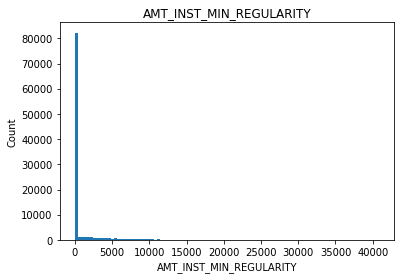

In [168]:
hist_maker(100, df_train['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'AMT_INST_MIN_REGULARITY')

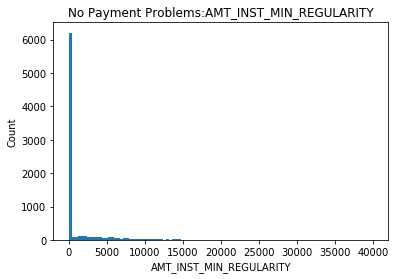

In [169]:
hist_maker(100, success1['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'No Payment Problems:AMT_INST_MIN_REGULARITY')

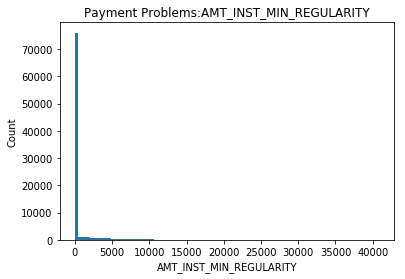

In [170]:
hist_maker(100, success0['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'Payment Problems:AMT_INST_MIN_REGULARITY')

In [171]:
#The next column we will look at is APARTMENTS_MEDI
#This column contains information about the median number of apartments
df_train['APARTMENTS_MEDI'].isnull().sum()

50682

In [172]:
df_train['APARTMENTS_MEDI'] = df_train['APARTMENTS_MEDI'].fillna(0)
success1['APARTMENTS_MEDI'] = success1['APARTMENTS_MEDI'].fillna(0)
success0['APARTMENTS_MEDI'] = success0['APARTMENTS_MEDI'].fillna(0)

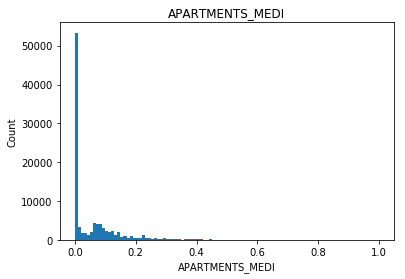

In [173]:
hist_maker(100, df_train['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'APARTMENTS_MEDI')

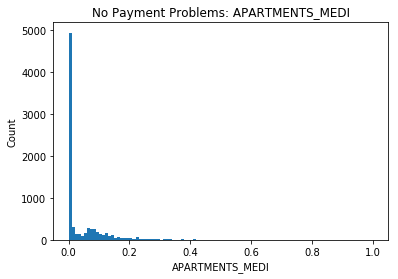

In [174]:
hist_maker(100, success1['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'No Payment Problems: APARTMENTS_MEDI')

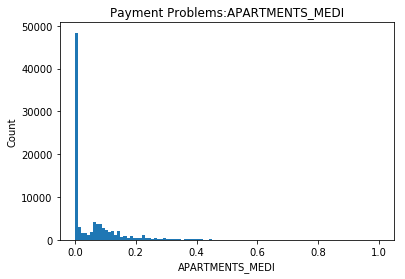

In [175]:
hist_maker(100, success0['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'Payment Problems:APARTMENTS_MEDI')

In [176]:
#The next column we will look at is AMT_DOWN_PAYMENT
#This column indicates the amount of down payment made by the applicant
df_train['AMT_DOWN_PAYMENT'].isnull().sum()

11079

In [177]:
df_train['AMT_DOWN_PAYMENT'] = df_train['AMT_DOWN_PAYMENT'].fillna(0)
success1['AMT_DOWN_PAYMENT'] = success1['AMT_DOWN_PAYMENT'].fillna(0)
success0['AMT_DOWN_PAYMENT'] = success0['AMT_DOWN_PAYMENT'].fillna(0)

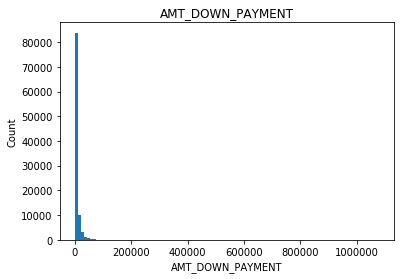

In [178]:
hist_maker(100, df_train['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT')

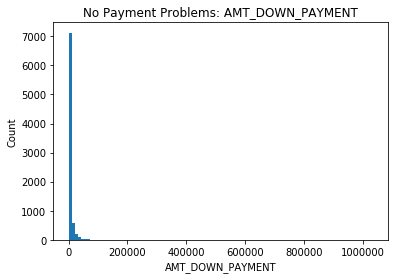

In [179]:
hist_maker(100, success1['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'No Payment Problems: AMT_DOWN_PAYMENT')

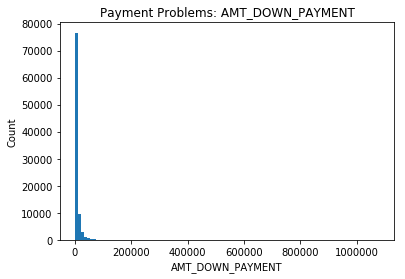

In [180]:
hist_maker(100, success0['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'Payment Problems: AMT_DOWN_PAYMENT')

In [181]:
#The next column we will look at is APARTMENTS_MODE
#This column indicates the mode values of apartments
df_train['APARTMENTS_MODE'].isnull().sum()

50682

In [182]:
df_train['APARTMENTS_MODE'] = df_train['APARTMENTS_MODE'].fillna(0)
success1['APARTMENTS_MODE'] = success1['APARTMENTS_MODE'].fillna(0)
success0['APARTMENTS_MODE'] = success0['APARTMENTS_MODE'].fillna(0)

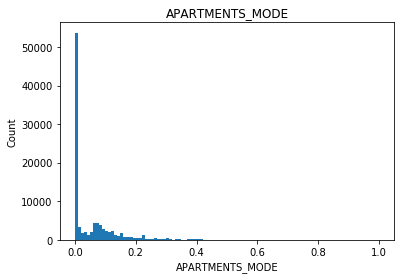

In [183]:
hist_maker(100, df_train['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'APARTMENTS_MODE')

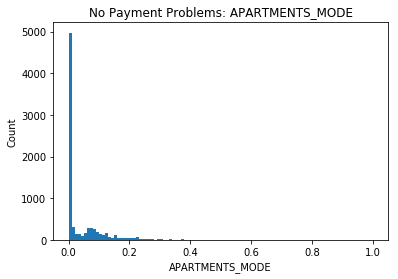

In [184]:
hist_maker(100, success1['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'No Payment Problems: APARTMENTS_MODE')

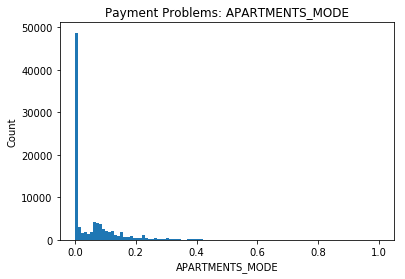

In [185]:
hist_maker(100, success0['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'Payment Problems: APARTMENTS_MODE')

In [186]:
#The next column we will look at is AMT_GOODS_PRICE_x
#This column indicates the value of goods
df_train['AMT_GOODS_PRICE_x'].isnull().sum()

81

In [187]:
df_train['AMT_GOODS_PRICE_x'] = df_train['AMT_GOODS_PRICE_x'].fillna(0)
success1['AMT_GOODS_PRICE_x'] = success1['AMT_GOODS_PRICE_x'].fillna(0)
success0['AMT_GOODS_PRICE_x'] = success0['AMT_GOODS_PRICE_x'].fillna(0)

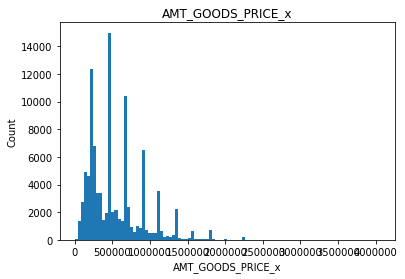

In [188]:
hist_maker(100, df_train['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_x')

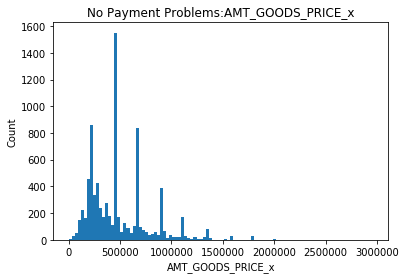

In [189]:
hist_maker(100, success1['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'No Payment Problems:AMT_GOODS_PRICE_x')

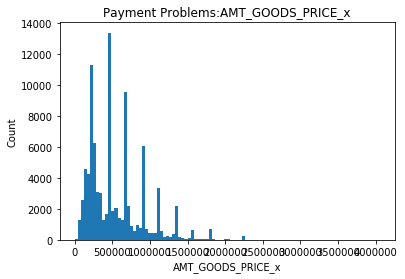

In [190]:
hist_maker(100, success0['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'Payment Problems:AMT_GOODS_PRICE_x')

In [191]:
#The next column we will look at is AMT_PAYMENT
#This column indicates the payment amount
df_train['AMT_PAYMENT'].isnull().sum()

5146

In [192]:
df_train['AMT_PAYMENT'] = df_train['AMT_PAYMENT'].fillna(0)
success1['AMT_PAYMENT'] = success1['AMT_PAYMENT'].fillna(0)
success0['AMT_PAYMENT'] = success0['AMT_PAYMENT'].fillna(0)

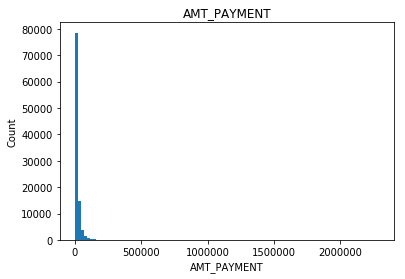

In [193]:
hist_maker(100, df_train['AMT_PAYMENT'], 'AMT_PAYMENT', 'AMT_PAYMENT')

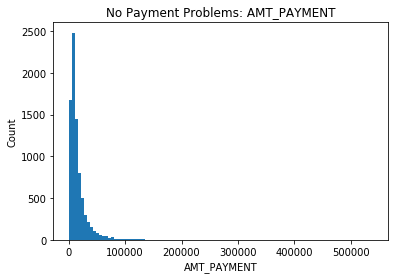

In [194]:
hist_maker(100, success1['AMT_PAYMENT'], 'AMT_PAYMENT', 'No Payment Problems: AMT_PAYMENT')

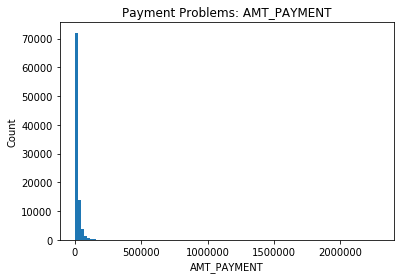

In [195]:
hist_maker(100, success0['AMT_PAYMENT'], 'AMT_PAYMENT', 'Payment Problems: AMT_PAYMENT')

In [196]:
#The next column we will look at is ENTRANCES_AVG
#This column indicates the averagera number of entrances
df_train['ENTRANCES_AVG'].isnull().sum()

50281

In [197]:
df_train['ENTRANCES_AVG'] = df_train['ENTRANCES_AVG'].fillna(0)
success1['ENTRANCES_AVG'] = success1['ENTRANCES_AVG'].fillna(0)
success0['ENTRANCES_AVG'] = success0['ENTRANCES_AVG'].fillna(0)

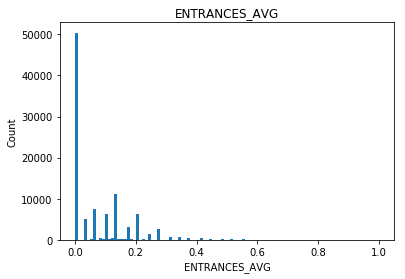

In [198]:
hist_maker(100, df_train['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'ENTRANCES_AVG')

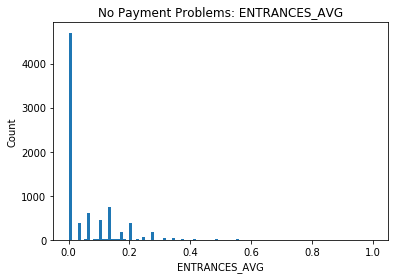

In [199]:
hist_maker(100, success1['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'No Payment Problems: ENTRANCES_AVG')

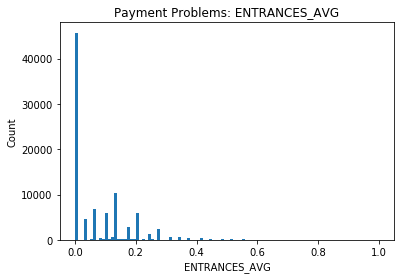

In [200]:
hist_maker(100, success0['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'Payment Problems: ENTRANCES_AVG')

In [201]:
#The next column we will look at is ENTRANCES_MEDI
#This column indicates the median number of entrances
df_train['ENTRANCES_MEDI'].isnull().sum()

50281

In [202]:
df_train['ENTRANCES_MEDI'] = df_train['ENTRANCES_MEDI'].fillna(0)
success1['ENTRANCES_MEDI'] = success1['ENTRANCES_MEDI'].fillna(0)
success0['ENTRANCES_MEDI'] = success0['ENTRANCES_MEDI'].fillna(0)

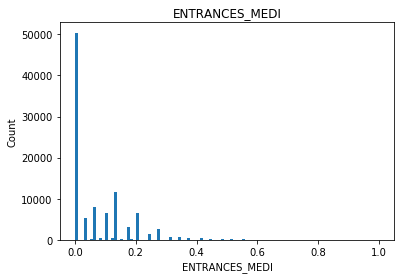

In [203]:
hist_maker(100, df_train['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'ENTRANCES_MEDI')

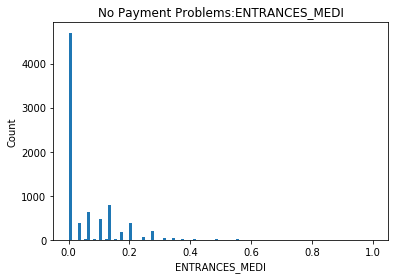

In [204]:
hist_maker(100, success1['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'No Payment Problems:ENTRANCES_MEDI')

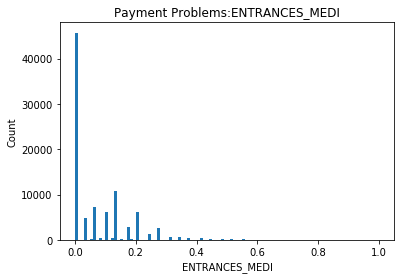

In [205]:
hist_maker(100, success0['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'Payment Problems:ENTRANCES_MEDI')

In [206]:
#The next column we will look at is ENTRANCES_MODE
#This column indicates the median number of entrances
df_train['ENTRANCES_MODE'].isnull().sum()

50281

In [207]:
df_train['ENTRANCES_MODE'] = df_train['ENTRANCES_MODE'].fillna(0)
success1['ENTRANCES_MODE'] = success1['ENTRANCES_MODE'].fillna(0)
success0['ENTRANCES_MODE'] = success0['ENTRANCES_MODE'].fillna(0)

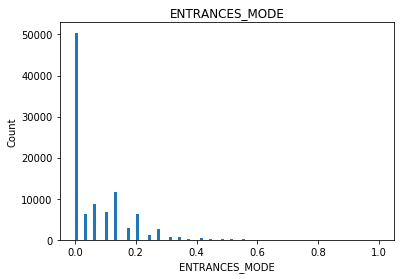

In [208]:
hist_maker(100, df_train['ENTRANCES_MODE'], 'ENTRANCES_MODE', 'ENTRANCES_MODE')

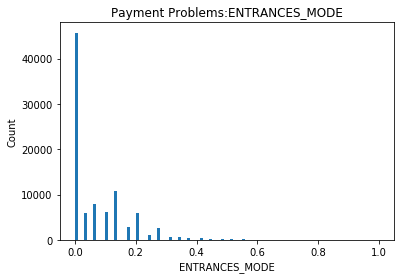

In [209]:
hist_maker(100, success0['ENTRANCES_MODE'], 'ENTRANCES_MODE', 'Payment Problems:ENTRANCES_MODE')

In [210]:
#The next column we will look at is NAME_INCOME_TYPE_Pensioner
#This column indicates if the applicants income comes from a pension
df_train['NAME_INCOME_TYPE_Pensioner'].isnull().sum()

0

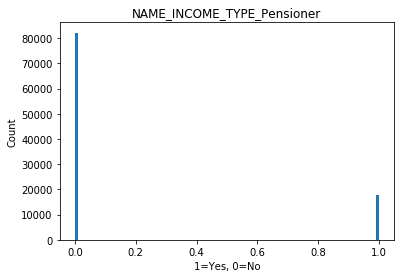

In [211]:
hist_maker(100, df_train['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'NAME_INCOME_TYPE_Pensioner')

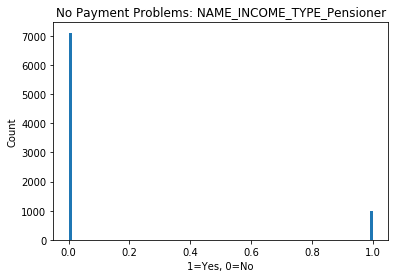

In [212]:
hist_maker(100, success1['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'No Payment Problems: NAME_INCOME_TYPE_Pensioner')

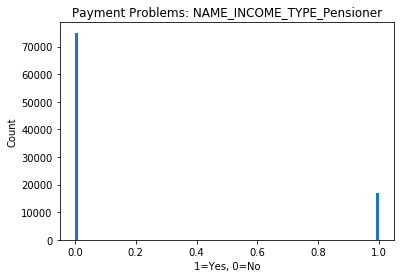

In [213]:
hist_maker(100, success0['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'Payment Problems: NAME_INCOME_TYPE_Pensioner')

In [214]:
# The next column we will look at is ORGANIZATION_TYPE_XNA
#This describes if an organization is an unknown type or not
df_train['ORGANIZATION_TYPE_XNA'].isnull().sum()

0

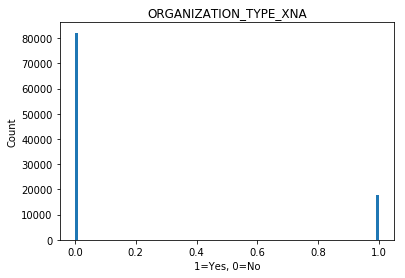

In [215]:
hist_maker(100, df_train['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'ORGANIZATION_TYPE_XNA')

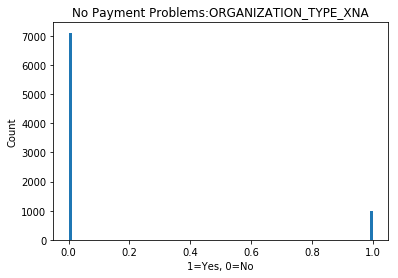

In [216]:
hist_maker(100, success1['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'No Payment Problems:ORGANIZATION_TYPE_XNA')

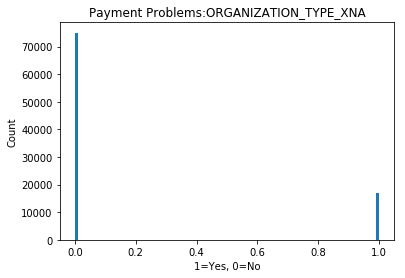

In [217]:
hist_maker(100, success0['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'Payment Problems:ORGANIZATION_TYPE_XNA')

In [218]:
#The next coumn we will look at is CNT_DRAWINGS_POS_CURRENT
#This column indicates the number of drawings for goods during the month of the previous credit
df_train['CNT_DRAWINGS_POS_CURRENT'].isnull().sum()

80334

In [219]:
df_train['CNT_DRAWINGS_POS_CURRENT'] = df_train['CNT_DRAWINGS_POS_CURRENT'].fillna(0)
success1['CNT_DRAWINGS_POS_CURRENT'] = success1['CNT_DRAWINGS_POS_CURRENT'].fillna(0)
success0['CNT_DRAWINGS_POS_CURRENT'] = success0['CNT_DRAWINGS_POS_CURRENT'].fillna(0)

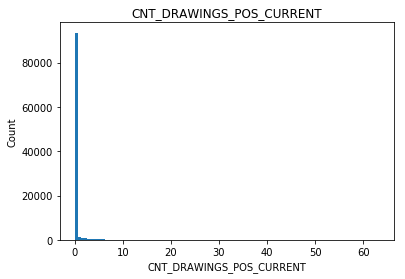

In [220]:
hist_maker(100, df_train['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT')

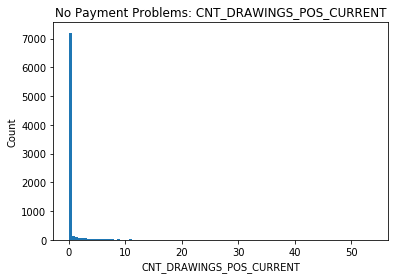

In [221]:
hist_maker(100, success1['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'No Payment Problems: CNT_DRAWINGS_POS_CURRENT')

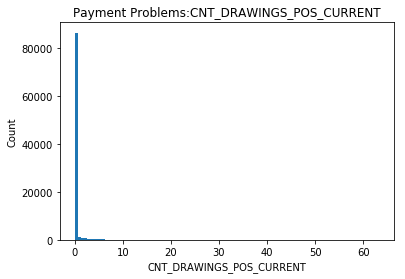

In [222]:
hist_maker(100, success0['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'Payment Problems:CNT_DRAWINGS_POS_CURRENT')

In [223]:
#The next column we will look at is FLAG_EMP_PHONE
#This column indicates if the provided a work number
df_train['FLAG_EMP_PHONE'].isnull().sum()

0

In [224]:
df_train['FLAG_EMP_PHONE'] = df_train['FLAG_EMP_PHONE'].fillna(0)
success1['FLAG_EMP_PHONE'] = success1['FLAG_EMP_PHONE'].fillna(0)
success0['FLAG_EMP_PHONE'] = success0['FLAG_EMP_PHONE'].fillna(0)

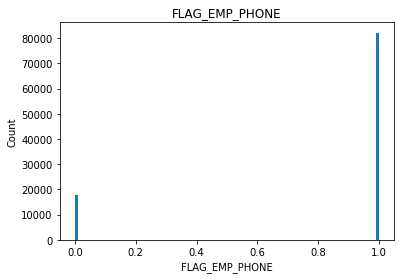

In [225]:
hist_maker(100, df_train['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'FLAG_EMP_PHONE')

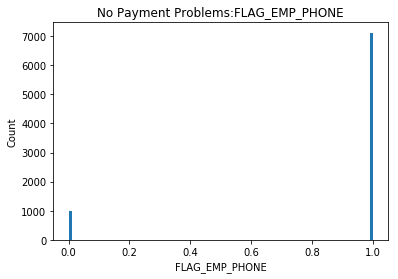

In [226]:
hist_maker(100, success1['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'No Payment Problems:FLAG_EMP_PHONE')

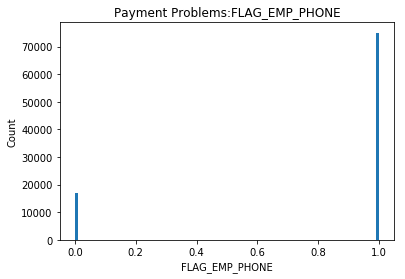

In [227]:
hist_maker(100, success0['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'Payment Problems:FLAG_EMP_PHONE')

In [228]:
#The next column we will look at is EMERGENCYSTATE_MODE_No
#This column describes if there is an emergency state or not
df_train['EMERGENCYSTATE_MODE_No'].isnull().sum()

0

In [229]:
df_train['EMERGENCYSTATE_MODE_No'] = df_train['EMERGENCYSTATE_MODE_No'].fillna(0)
success1['EMERGENCYSTATE_MODE_No'] = success1['EMERGENCYSTATE_MODE_No'].fillna(0)
success0['EMERGENCYSTATE_MODE_No'] = success0['EMERGENCYSTATE_MODE_No'].fillna(0)

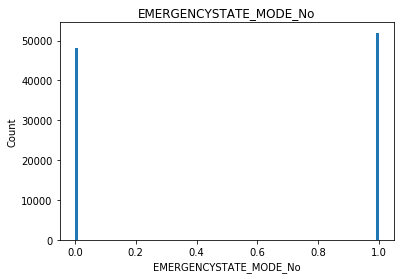

In [230]:
hist_maker(100, df_train['EMERGENCYSTATE_MODE_No'], 'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_No')

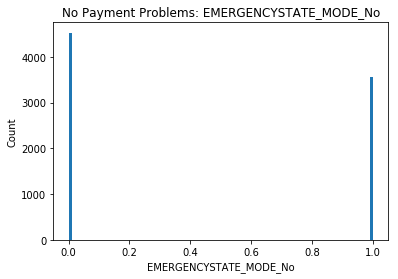

In [231]:
hist_maker(100, success1['EMERGENCYSTATE_MODE_No'], 'EMERGENCYSTATE_MODE_No', 'No Payment Problems: EMERGENCYSTATE_MODE_No')

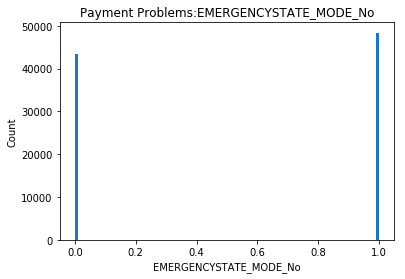

In [232]:
hist_maker(100, success0['EMERGENCYSTATE_MODE_No'], 'EMERGENCYSTATE_MODE_No', 'Payment Problems:EMERGENCYSTATE_MODE_No')

In [233]:
#The next column we will look at is REGION_RATING_CLIENT_W_CITY
#This column indicates the rating of the region with the city included
df_train['REGION_RATING_CLIENT_W_CITY'].isnull().sum()

0

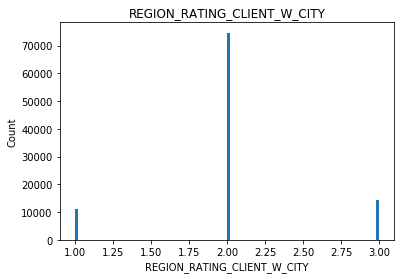

In [234]:
hist_maker(100, df_train['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY')

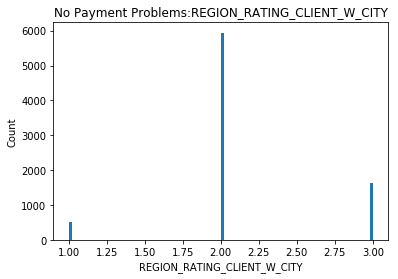

In [235]:
hist_maker(100, success1['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'No Payment Problems:REGION_RATING_CLIENT_W_CITY')

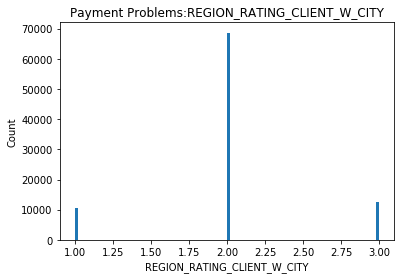

In [236]:
hist_maker(100, success0['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'Payment Problems:REGION_RATING_CLIENT_W_CITY')

In [237]:
#The next column we will look at is REG_CITY_NOT_WORK_CITY
#This column indicates if the permanent address and the contact address do not match
df_train['REG_CITY_NOT_WORK_CITY'].isnull().sum()

0

In [238]:
df_train['REG_CITY_NOT_WORK_CITY'] = df_train['REG_CITY_NOT_WORK_CITY'].fillna(0)
success1['REG_CITY_NOT_WORK_CITY'] = success1['REG_CITY_NOT_WORK_CITY'].fillna(0)
success0['REG_CITY_NOT_WORK_CITY'] = success0['REG_CITY_NOT_WORK_CITY'].fillna(0)

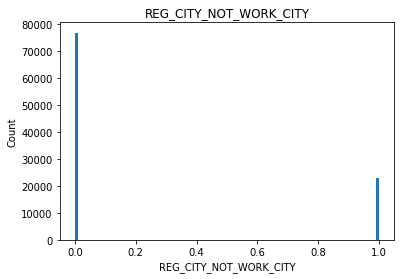

In [239]:
hist_maker(100, df_train['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY')

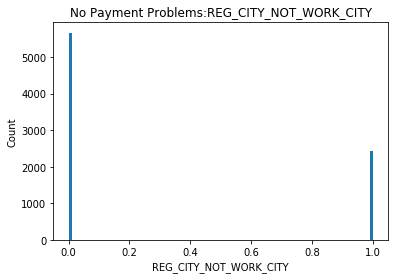

In [240]:
hist_maker(100, success1['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'No Payment Problems:REG_CITY_NOT_WORK_CITY')

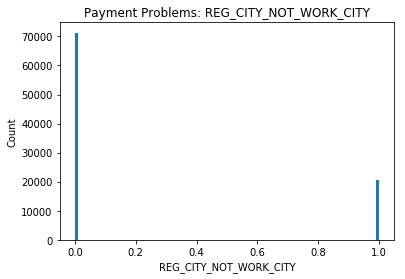

In [241]:
hist_maker(100, success0['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'Payment Problems: REG_CITY_NOT_WORK_CITY')

In [242]:
#The next column we will look at is REGION_RATING_CLIENT
#This includes the rating of the region
df_train['REGION_RATING_CLIENT'].isnull().sum()

0

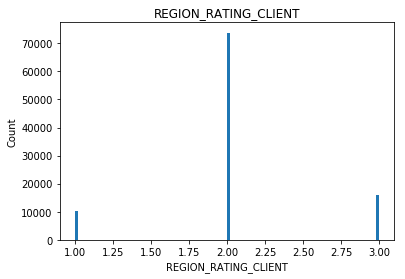

In [243]:
hist_maker(100, df_train['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT')

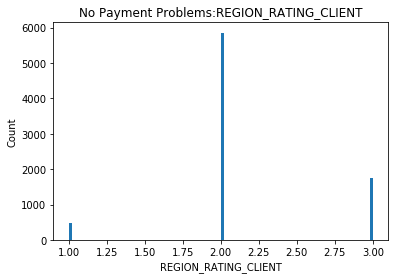

In [244]:
hist_maker(100, success1['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'No Payment Problems:REGION_RATING_CLIENT')

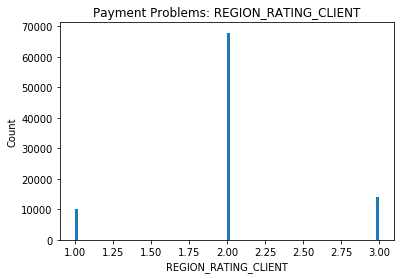

In [245]:
hist_maker(100, success0['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'Payment Problems: REGION_RATING_CLIENT')

In [246]:
#The next column we will look at is HOUSETYPE_MODE_block of flats
#This column indicates if the house is a blocks of flats
df_train['HOUSETYPE_MODE_block of flats'].isnull().sum()

0

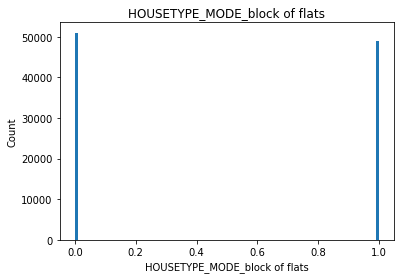

In [247]:
hist_maker(100, df_train['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_block of flats')

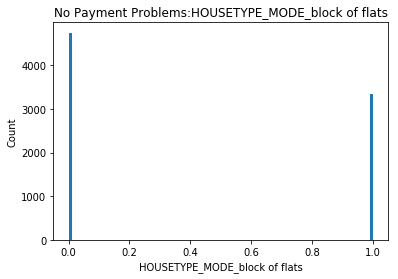

In [248]:
hist_maker(100, success1['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'No Payment Problems:HOUSETYPE_MODE_block of flats')

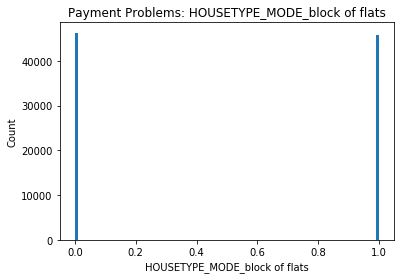

In [249]:
hist_maker(100, success0['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'Payment Problems: HOUSETYPE_MODE_block of flats')

In [250]:
#The next column we are looking at is FLAG_DOCUMENT_3
#This column indicates if they received document 3.
df_train['FLAG_DOCUMENT_3'].isnull().sum()

0

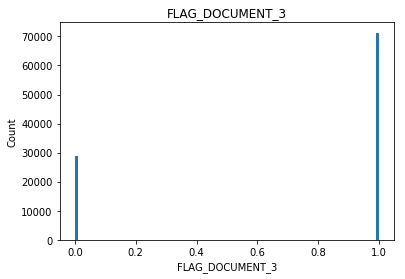

In [251]:
hist_maker(100, df_train['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_3')

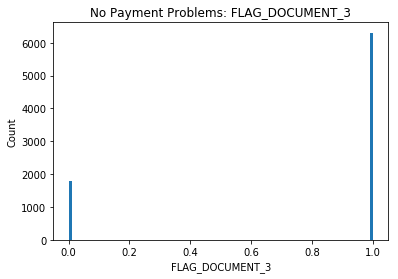

In [252]:
hist_maker(100, success1['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'No Payment Problems: FLAG_DOCUMENT_3')

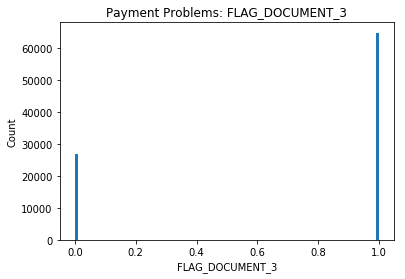

In [253]:
hist_maker(100, success0['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'Payment Problems: FLAG_DOCUMENT_3')

In [254]:
#The next column we will look at is SELLERPLACE_AREA
df_train['SELLERPLACE_AREA'].isnull().sum()

5346

In [255]:
df_train['SELLERPLACE_AREA'] = df_train['SELLERPLACE_AREA'].fillna(0)
success1['SELLERPLACE_AREA'] = success1['SELLERPLACE_AREA'].fillna(0)
success0['SELLERPLACE_AREA'] = success0['SELLERPLACE_AREA'].fillna(0)

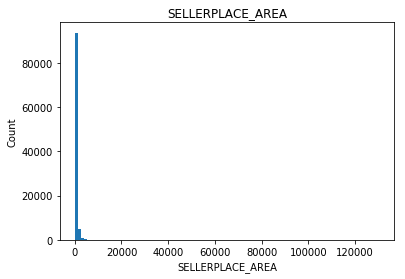

In [256]:
hist_maker(100, df_train['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'SELLERPLACE_AREA')

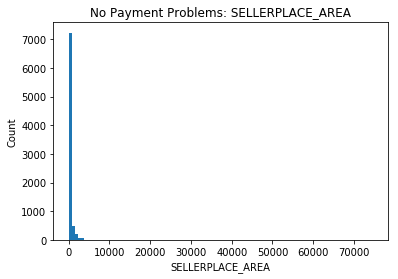

In [257]:
hist_maker(100, success1['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'No Payment Problems: SELLERPLACE_AREA')

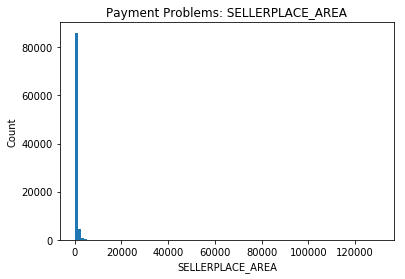

In [258]:
hist_maker(100, success0['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'Payment Problems: SELLERPLACE_AREA')

In [259]:
#The next column we will look at is AMT_PAYMENT_TOTAL_CURRENT
#This column indicates the total amout of payment
df_train['AMT_PAYMENT_TOTAL_CURRENT'].isnull().sum()

71781

In [260]:
df_train['AMT_PAYMENT_TOTAL_CURRENT'] = df_train['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)
success1['AMT_PAYMENT_TOTAL_CURRENT'] = success1['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)
success0['AMT_PAYMENT_TOTAL_CURRENT'] = success0['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)

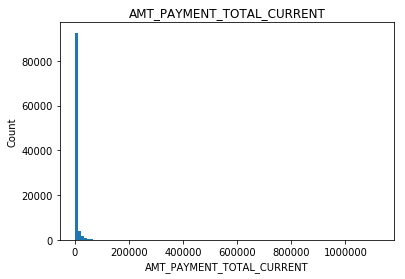

In [261]:
hist_maker(100, df_train['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT')

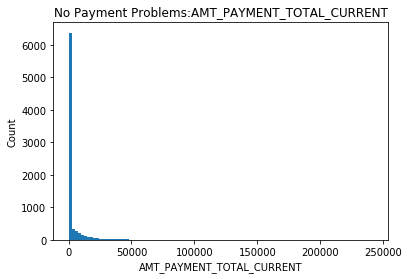

In [262]:
hist_maker(100, success1['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'No Payment Problems:AMT_PAYMENT_TOTAL_CURRENT')

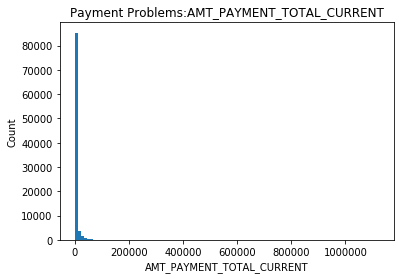

In [263]:
hist_maker(100, success0['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'Payment Problems:AMT_PAYMENT_TOTAL_CURRENT')

In [264]:
#The next column we will look at is AMT_DRAWINGS_POS_CURRENT
#This column indicates the current drawings
df_train['AMT_DRAWINGS_POS_CURRENT'].isnull().sum()

80334

In [265]:
df_train['AMT_DRAWINGS_POS_CURRENT'] = df_train['AMT_DRAWINGS_POS_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_POS_CURRENT'] = success1['AMT_DRAWINGS_POS_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_POS_CURRENT'] = success0['AMT_DRAWINGS_POS_CURRENT'].fillna(0)

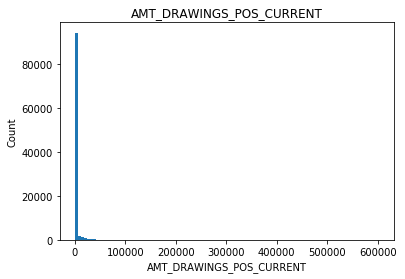

In [266]:
hist_maker(100, df_train['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT')

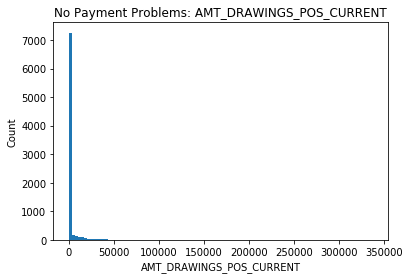

In [267]:
hist_maker(100, success1['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'No Payment Problems: AMT_DRAWINGS_POS_CURRENT')

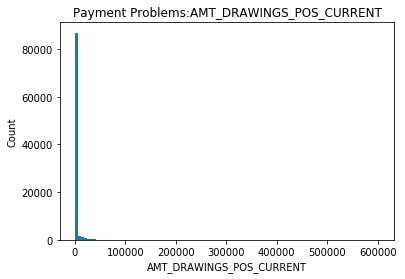

In [268]:
hist_maker(100, success0['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'Payment Problems:AMT_DRAWINGS_POS_CURRENT')

In [269]:
#The next column we will look at is NONLIVINGAREA_AVG
#This column indicates the average non living area.
df_train['NONLIVINGAREA_AVG'].isnull().sum()

55070

In [270]:
df_train['NONLIVINGAREA_AVG'] = df_train['NONLIVINGAREA_AVG'].fillna(0)
success1['NONLIVINGAREA_AVG'] = success1['NONLIVINGAREA_AVG'].fillna(0)
success0['NONLIVINGAREA_AVG'] = success0['NONLIVINGAREA_AVG'].fillna(0)

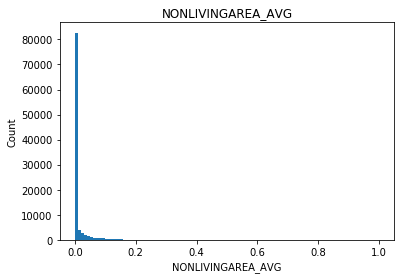

In [271]:
hist_maker(100, df_train['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_AVG')

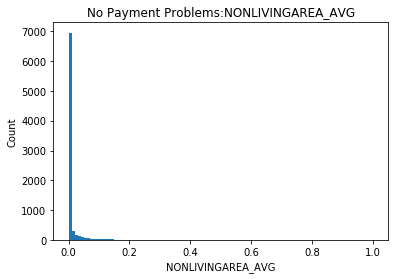

In [272]:
hist_maker(100, success1['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'No Payment Problems:NONLIVINGAREA_AVG')

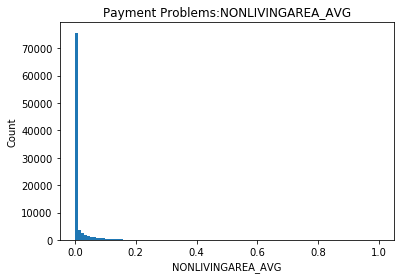

In [273]:
hist_maker(100, success0['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'Payment Problems:NONLIVINGAREA_AVG')

In [274]:
#The next column we will look at is NONLIVINGAREA_MODE
#This column indicates the average non living area.
df_train['NONLIVINGAREA_MODE'].isnull().sum()

55070

In [275]:
df_train['NONLIVINGAREA_MODE'] = df_train['NONLIVINGAREA_MODE'].fillna(0)
success1['NONLIVINGAREA_MODE'] = success1['NONLIVINGAREA_MODE'].fillna(0)
success0['NONLIVINGAREA_MODE'] = success0['NONLIVINGAREA_MODE'].fillna(0)

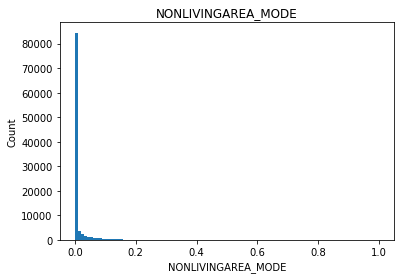

In [276]:
hist_maker(100, df_train['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MODE')

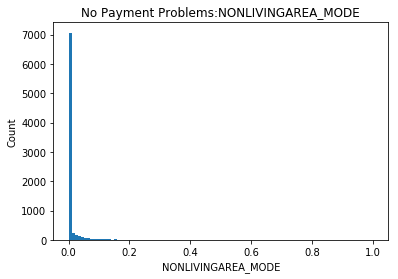

In [277]:
hist_maker(100, success1['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'No Payment Problems:NONLIVINGAREA_MODE')

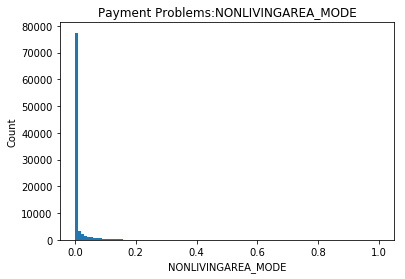

In [278]:
hist_maker(100, success0['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'Payment Problems:NONLIVINGAREA_MODE')

In [279]:
#The next column we will look at is NONLIVINGAREA_MEDI
#This column indicates the average non living area.
df_train['NONLIVINGAREA_MEDI'].isnull().sum()

55070

In [280]:
df_train['NONLIVINGAREA_MEDI'] = df_train['NONLIVINGAREA_MEDI'].fillna(0)
success1['NONLIVINGAREA_MEDI'] = success1['NONLIVINGAREA_MEDI'].fillna(0)
success0['NONLIVINGAREA_MEDI'] = success0['NONLIVINGAREA_MEDI'].fillna(0)

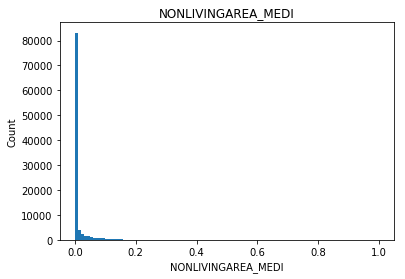

In [281]:
hist_maker(100, df_train['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI')

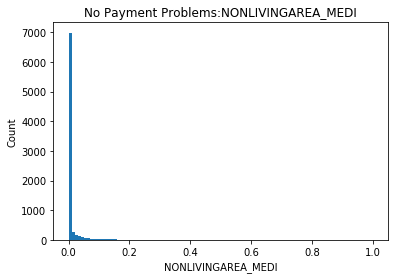

In [282]:
hist_maker(100, success1['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'No Payment Problems:NONLIVINGAREA_MEDI')

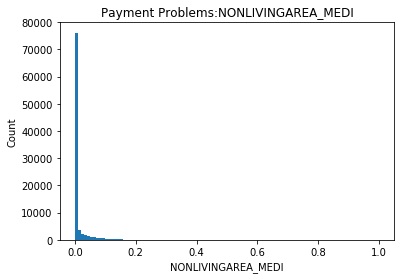

In [283]:
hist_maker(100, success0['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'Payment Problems:NONLIVINGAREA_MEDI')

In [284]:
#The next column we will look at is ELEVATORS_AVG
#This column indicates the average number of elevators
df_train['ELEVATORS_AVG'].isnull().sum()

53300

In [285]:
df_train['ELEVATORS_AVG'] = df_train['ELEVATORS_AVG'].fillna(0)
success1['ELEVATORS_AVG'] = success1['ELEVATORS_AVG'].fillna(0)
success0['ELEVATORS_AVG'] = success0['ELEVATORS_AVG'].fillna(0)

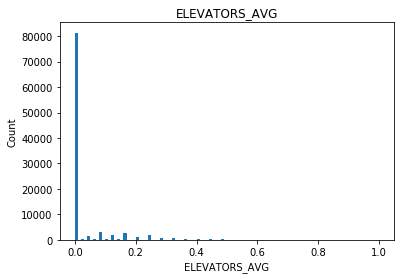

In [286]:
hist_maker(100, df_train['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'ELEVATORS_AVG')

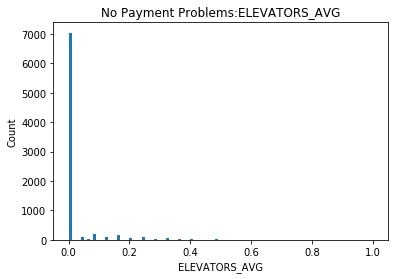

In [287]:
hist_maker(100, success1['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'No Payment Problems:ELEVATORS_AVG')

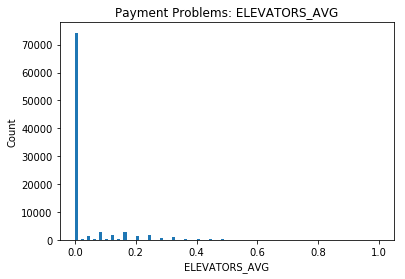

In [288]:
hist_maker(100, success0['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'Payment Problems: ELEVATORS_AVG')

In [289]:
#The next column we will look at is ELEVATORS_MEDI
#This column indicates the median number of elevators
df_train['ELEVATORS_MEDI'].isnull().sum()

53300

In [290]:
df_train['ELEVATORS_MEDI'] = df_train['ELEVATORS_MEDI'].fillna(0)
success1['ELEVATORS_MEDI'] = success1['ELEVATORS_MEDI'].fillna(0)
success0['ELEVATORS_MEDI'] = success0['ELEVATORS_MEDI'].fillna(0)

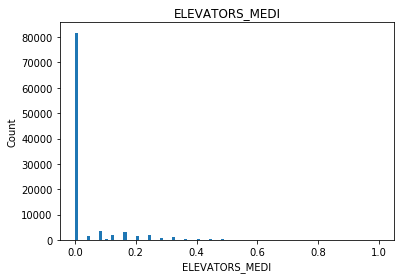

In [291]:
hist_maker(100, df_train['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'ELEVATORS_MEDI')

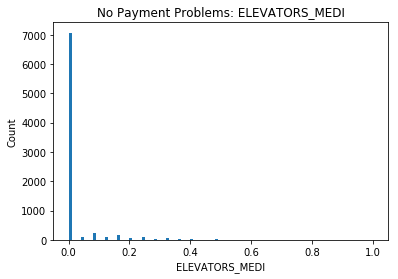

In [292]:
hist_maker(100, success1['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'No Payment Problems: ELEVATORS_MEDI')

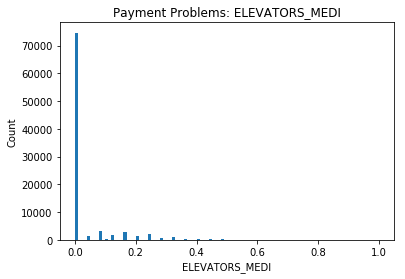

In [293]:
hist_maker(100, success0['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'Payment Problems: ELEVATORS_MEDI')

In [294]:
#The next column we will look at is ELEVATORS_MODE
#This column indicates the mode number of elevators
df_train['ELEVATORS_MODE'].isnull().sum()

53300

In [295]:
df_train['ELEVATORS_MODE'] = df_train['ELEVATORS_MODE'].fillna(0)
success1['ELEVATORS_MODE'] = success1['ELEVATORS_MODE'].fillna(0)
success0['ELEVATORS_MODE'] = success0['ELEVATORS_MODE'].fillna(0)

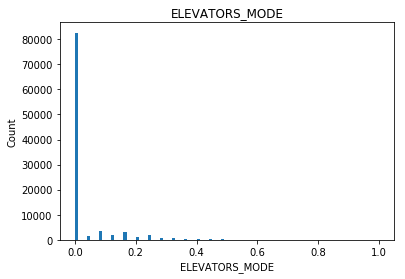

In [296]:
hist_maker(100, df_train['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'ELEVATORS_MODE')

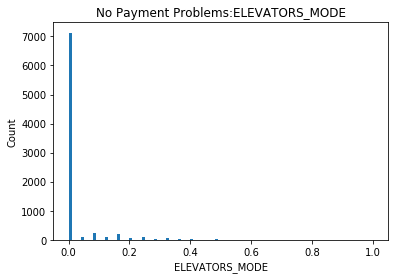

In [297]:
hist_maker(100, success1['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'No Payment Problems:ELEVATORS_MODE')

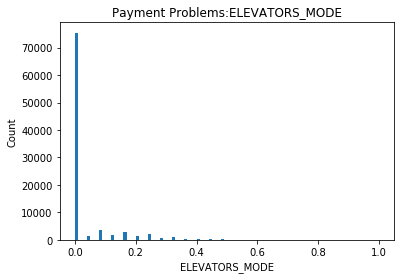

In [298]:
hist_maker(100, success0['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'Payment Problems:ELEVATORS_MODE')

In [299]:
#The next column we will look at is DAYS_LAST_DUE_1ST_VERSION
#Relative to application date of current application when was the first due of the previous application
df_train['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

5763

In [300]:
df_train['DAYS_LAST_DUE_1ST_VERSION'] = df_train['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)
success1['DAYS_LAST_DUE_1ST_VERSION'] = success1['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)
success0['DAYS_LAST_DUE_1ST_VERSION'] = success0['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)

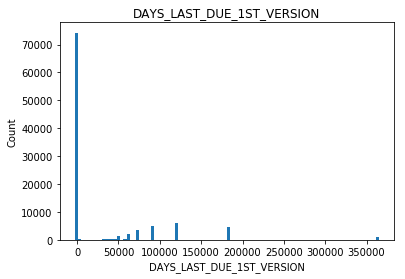

In [301]:
hist_maker(100, df_train['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE_1ST_VERSION')

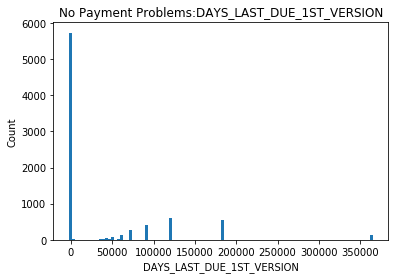

In [302]:
hist_maker(100, success1['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'No Payment Problems:DAYS_LAST_DUE_1ST_VERSION')

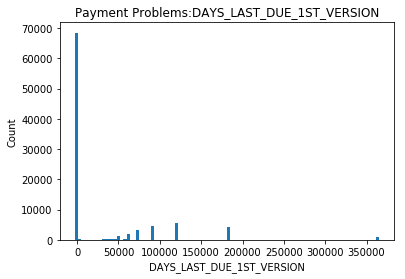

In [303]:
hist_maker(100, success0['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'Payment Problems:DAYS_LAST_DUE_1ST_VERSION')

In [304]:
#The next xolumn we will look at is BASEMENTAREA_AVG
#This column indicates the average basement area
df_train['BASEMENTAREA_AVG'].isnull().sum()

58360

In [305]:
df_train['BASEMENTAREA_AVG'] = df_train['BASEMENTAREA_AVG'].fillna(0)
success1['BASEMENTAREA_AVG'] = success1['BASEMENTAREA_AVG'].fillna(0)
success0['BASEMENTAREA_AVG'] = success0['BASEMENTAREA_AVG'].fillna(0)

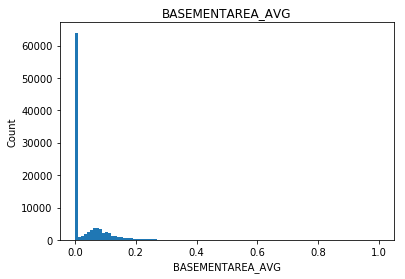

In [306]:
hist_maker(100, df_train['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'BASEMENTAREA_AVG')

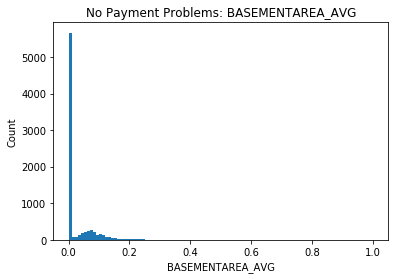

In [307]:
hist_maker(100, success1['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'No Payment Problems: BASEMENTAREA_AVG')

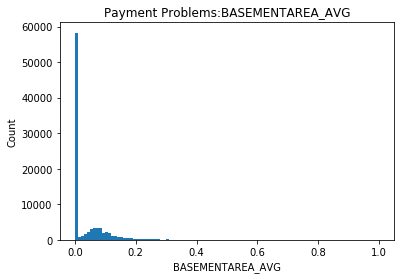

In [308]:
hist_maker(100, success0['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'Payment Problems:BASEMENTAREA_AVG')

In [309]:
#The next column we willl look at is OCCUPATION_TYPE_Laborers
#This column indicates if the client's occupation is laborer
df_train['OCCUPATION_TYPE_Laborers'].isnull().sum()

0

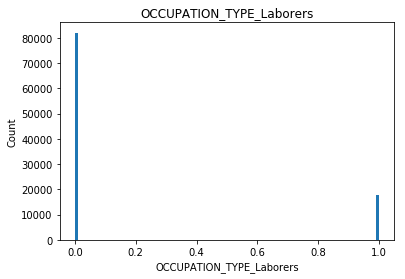

In [310]:
hist_maker(100, df_train['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Laborers')

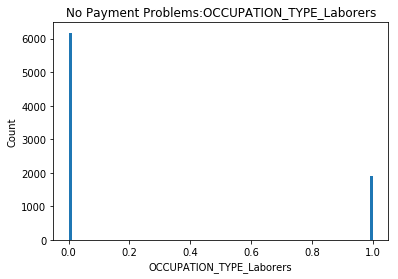

In [311]:
hist_maker(100, success1['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'No Payment Problems:OCCUPATION_TYPE_Laborers')

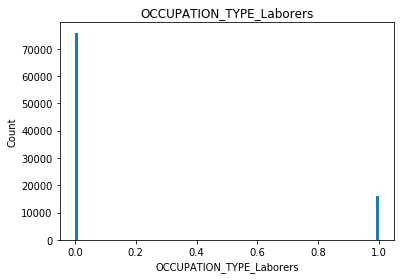

In [312]:
hist_maker(100, success0['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Laborers')

In [313]:
#The next column we will look at is FLOORSMIN_AVG
#This column indicates the minimum number of floors
df_train['FLOORSMIN_AVG'].isnull().sum()

67703

In [314]:
df_train['FLOORSMIN_AVG'] = df_train['FLOORSMIN_AVG'].fillna(0)
success1['FLOORSMIN_AVG'] = success1['FLOORSMIN_AVG'].fillna(0)
success0['FLOORSMIN_AVG'] = success0['FLOORSMIN_AVG'].fillna(0)

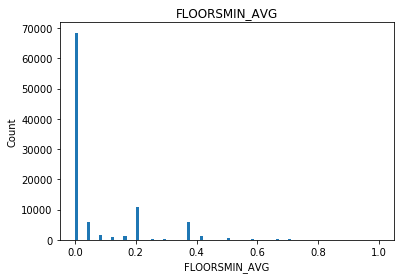

In [315]:
hist_maker(100, df_train['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'FLOORSMIN_AVG')

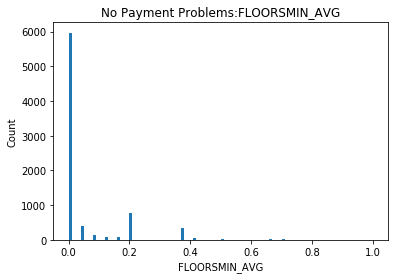

In [316]:
hist_maker(100, success1['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'No Payment Problems:FLOORSMIN_AVG')

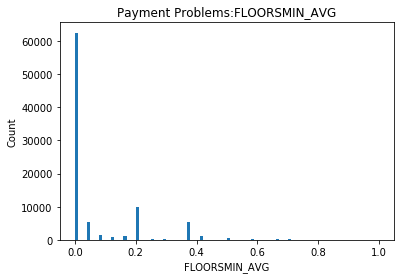

In [317]:
hist_maker(100,success0['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'Payment Problems:FLOORSMIN_AVG')

In [318]:
#The next column we will look at is BASEMENTAREA_MEDI
#This column indicates the median basement area
df_train['BASEMENTAREA_MEDI'].isnull().sum()

58360

In [319]:
df_train['BASEMENTAREA_MEDI'] = df_train['BASEMENTAREA_MEDI'].fillna(0)
success1['BASEMENTAREA_MEDI'] = success1['BASEMENTAREA_MEDI'].fillna(0)
success0['BASEMENTAREA_MEDI'] = success0['BASEMENTAREA_MEDI'].fillna(0)

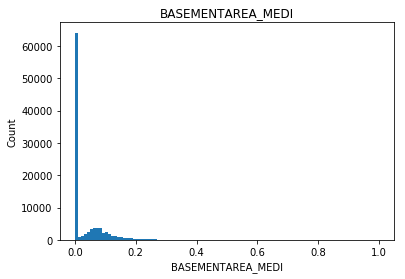

In [320]:
hist_maker(100, df_train['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MEDI')

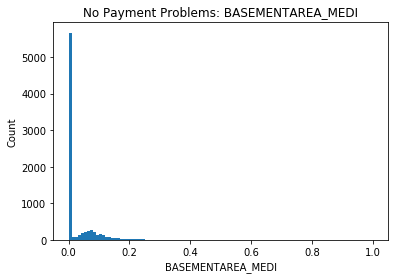

In [321]:
hist_maker(100, success1['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'No Payment Problems: BASEMENTAREA_MEDI')

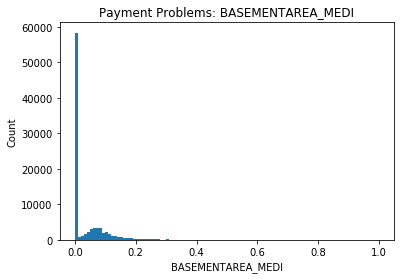

In [322]:
hist_maker(100, success0['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'Payment Problems: BASEMENTAREA_MEDI')

In [323]:
#The next column we will look at is AMT_ANNUITY
#This column indicates the amount of the annuity
df_train['AMT_ANNUITY'].isnull().sum()

5466

In [324]:
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].fillna(0)
success1['AMT_ANNUITY'] = success1['AMT_ANNUITY'].fillna(0)
success0['AMT_ANNUITY'] = success0['AMT_ANNUITY'].fillna(0)

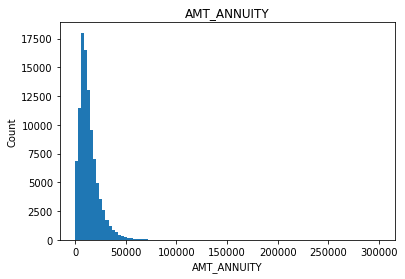

In [325]:
hist_maker(100, df_train['AMT_ANNUITY'], 'AMT_ANNUITY', 'AMT_ANNUITY')

In [ ]:
hist_maker(100, df_train['AMT_ANNUITY'], 'AMT_ANNUITY', 'AMT_ANNUITY')

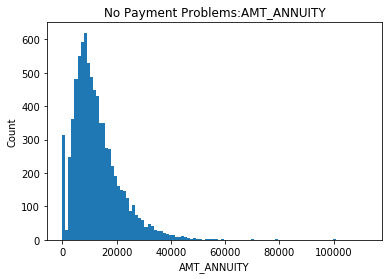

In [326]:
hist_maker(100, success1['AMT_ANNUITY'], 'AMT_ANNUITY', 'No Payment Problems:AMT_ANNUITY')

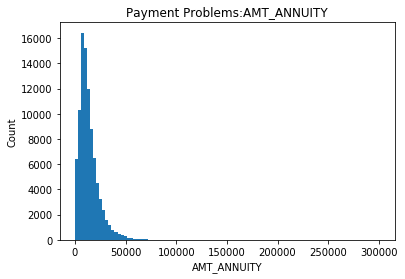

In [327]:
hist_maker(100, success0['AMT_ANNUITY'], 'AMT_ANNUITY', 'Payment Problems:AMT_ANNUITY')

In [329]:
#The next column we will look at is FLOORSMIN_MODE
#This column indicates the mode minimum number of floors
df_train['FLOORSMIN_MODE'].isnull().sum()

67703

In [330]:
df_train['FLOORSMIN_MODE'] = df_train['FLOORSMIN_MODE'].fillna(0)
success1['FLOORSMIN_MODE'] = success1['FLOORSMIN_MODE'].fillna(0)
success0['FLOORSMIN_MODE'] = success0['FLOORSMIN_MODE'].fillna(0)

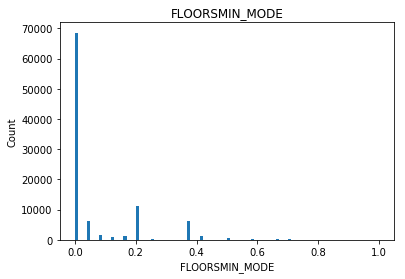

In [331]:
hist_maker(100, df_train['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'FLOORSMIN_MODE')

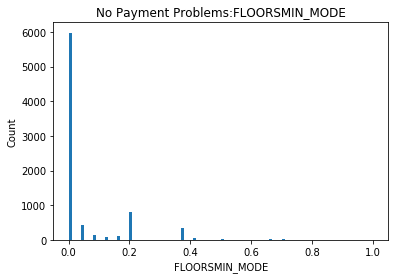

In [332]:
hist_maker(100, success1['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'No Payment Problems:FLOORSMIN_MODE')

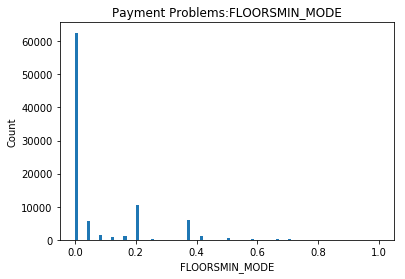

In [333]:
hist_maker(100, success0['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'Payment Problems:FLOORSMIN_MODE')

In [334]:
#The next column we will look at is OWN_CAR_AGE
#This column indcaites the age of a car if they own a car
df_train['OWN_CAR_AGE'].isnull().sum()

66019

In [335]:
df_train['OWN_CAR_AGE'] = df_train['OWN_CAR_AGE'].fillna(0)
success1['OWN_CAR_AGE'] = success1['OWN_CAR_AGE'].fillna(0)
success0['OWN_CAR_AGE'] = success0['OWN_CAR_AGE'].fillna(0)

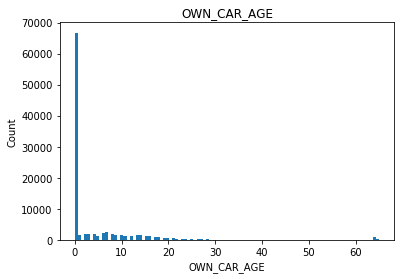

In [336]:
hist_maker(100, df_train['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'OWN_CAR_AGE')

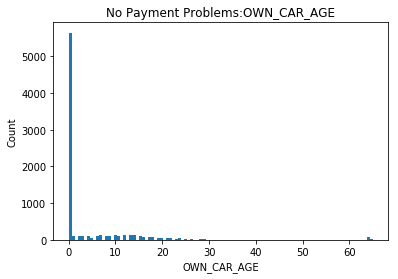

In [337]:
hist_maker(100, success1['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'No Payment Problems:OWN_CAR_AGE')

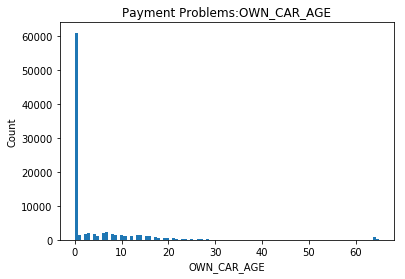

In [338]:
hist_maker(100, success0['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'Payment Problems:OWN_CAR_AGE')

In [339]:
#The next column we will look at is BASEMENTAREA_MEDI
#This column indicates the median of basement areas
df_train['BASEMENTAREA_MEDI'].isnull().sum()

0

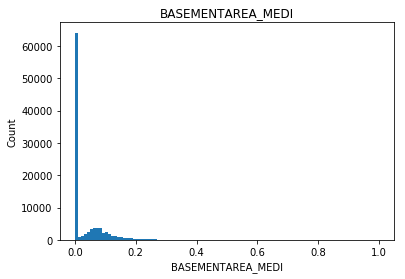

In [340]:
hist_maker(100, df_train['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MEDI')

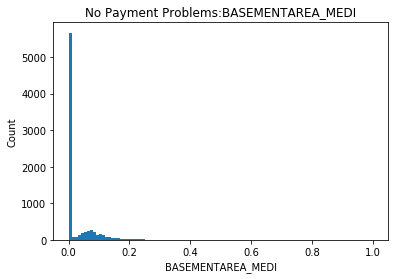

In [341]:
hist_maker(100, success1['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'No Payment Problems:BASEMENTAREA_MEDI')

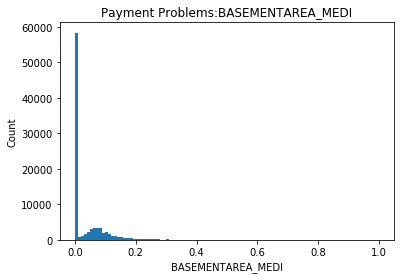

In [342]:
hist_maker(100, success0['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'Payment Problems:BASEMENTAREA_MEDI')

In [344]:
#The next column we will look at is BASEMENTAREA_MODE
#This column indicates the median of basement areas
df_train['BASEMENTAREA_MODE'].isnull().sum()

58360

In [345]:
df_train['BASEMENTAREA_MODE'] = df_train['BASEMENTAREA_MODE'].fillna(0)
success1['BASEMENTAREA_MODE'] = success1['BASEMENTAREA_MODE'].fillna(0)
success0['BASEMENTAREA_MODE'] = success0['BASEMENTAREA_MODE'].fillna(0)

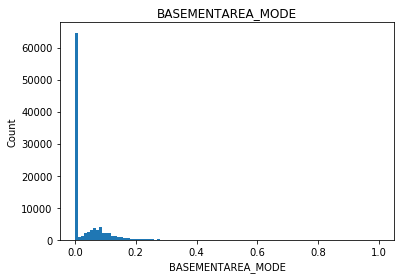

In [347]:
hist_maker(100, df_train['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'BASEMENTAREA_MODE')

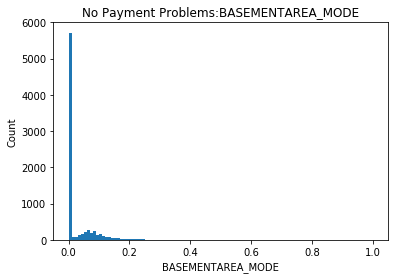

In [348]:
hist_maker(100, success1['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'No Payment Problems:BASEMENTAREA_MODE')

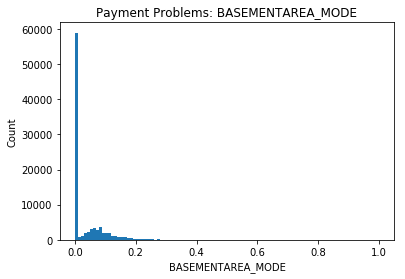

In [349]:
hist_maker(100, success0['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'Payment Problems: BASEMENTAREA_MODE')

In [350]:
#The next column we will look at is HOUR_APPR_PROCESS_START_y
#This column indincates approxiamately what time the application was started
df_train['HOUR_APPR_PROCESS_START_y'].isnull().sum()

5346

In [351]:
df_train['HOUR_APPR_PROCESS_START_y'] = df_train['HOUR_APPR_PROCESS_START_y'].fillna(0)
success1['HOUR_APPR_PROCESS_START_y'] = success1['HOUR_APPR_PROCESS_START_y'].fillna(0)
success0['HOUR_APPR_PROCESS_START_y'] = success0['HOUR_APPR_PROCESS_START_y'].fillna(0)

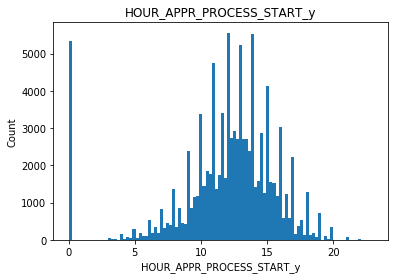

In [352]:
hist_maker(100, df_train['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y')

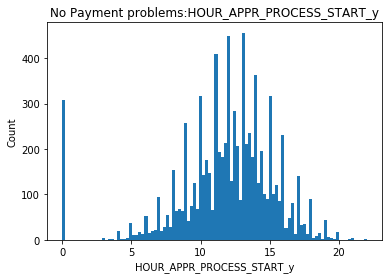

In [353]:
hist_maker(100, success1['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'No Payment problems:HOUR_APPR_PROCESS_START_y')

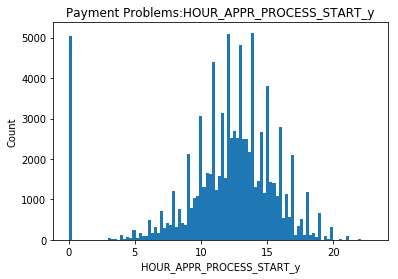

In [354]:
hist_maker(100, success0['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'Payment Problems:HOUR_APPR_PROCESS_START_y')

In [355]:
#The next column we will look at is AMT_INSTALMENT
#This column indicates the amount of installment due
df_train['AMT_INSTALMENT'].isnull().sum()

5145

In [356]:
df_train['AMT_INSTALMENT'] = df_train['AMT_INSTALMENT'].fillna(0)
success1['AMT_INSTALMENT'] = success1['AMT_INSTALMENT'].fillna(0)
success0['AMT_INSTALMENT'] = success0['AMT_INSTALMENT'].fillna(0)

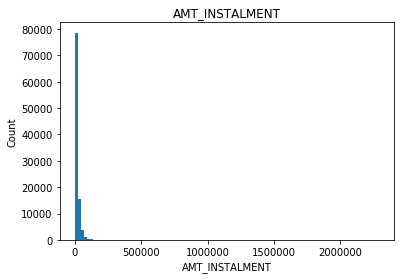

In [357]:
hist_maker(100, df_train['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'AMT_INSTALMENT')

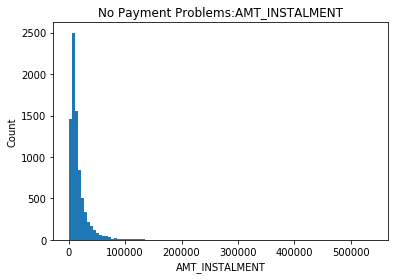

In [358]:
hist_maker(100, success1['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'No Payment Problems:AMT_INSTALMENT')

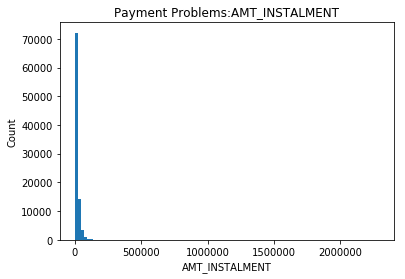

In [359]:
hist_maker(100, success0['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'Payment Problems:AMT_INSTALMENT')

In [360]:
#The next column we will look at is MONTHS_BALANCE_x.1
#This column indicates months balance
df_train['MONTHS_BALANCE_x.1'].isnull().sum()

5897

In [361]:
df_train['MONTHS_BALANCE_x.1'] = df_train['MONTHS_BALANCE_x.1'].fillna(0)
success1['MONTHS_BALANCE_x.1'] = success1['MONTHS_BALANCE_x.1'].fillna(0)
success0['MONTHS_BALANCE_x.1'] = success0['MONTHS_BALANCE_x.1'].fillna(0)

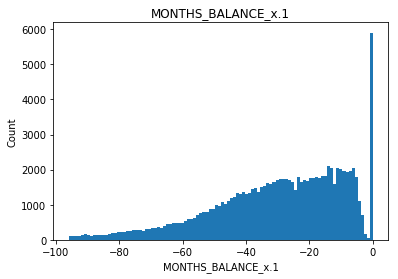

In [362]:
hist_maker(100, df_train['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'MONTHS_BALANCE_x.1')

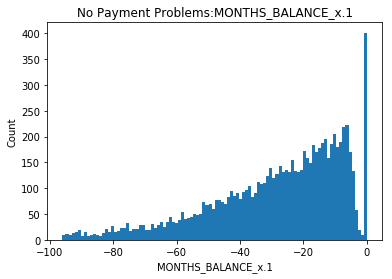

In [363]:
hist_maker(100,success1['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'No Payment Problems:MONTHS_BALANCE_x.1')

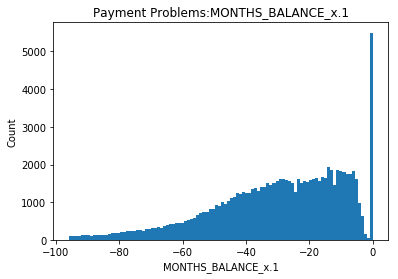

In [364]:
hist_maker(100, success0['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'Payment Problems:MONTHS_BALANCE_x.1')

In [367]:
#The next column we will look at is CNT_DRAWINGS_OTHER_CURRENT
df_train['CNT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

80334

In [368]:
df_train['CNT_DRAWINGS_OTHER_CURRENT'] = df_train['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success1['CNT_DRAWINGS_OTHER_CURRENT'] = success1['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success0['CNT_DRAWINGS_OTHER_CURRENT'] = success0['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)

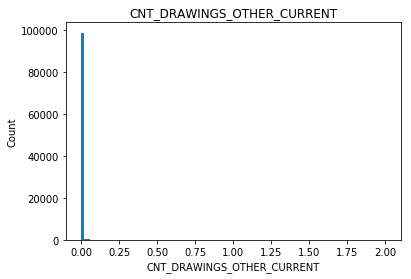

In [369]:
hist_maker(100, df_train['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT')

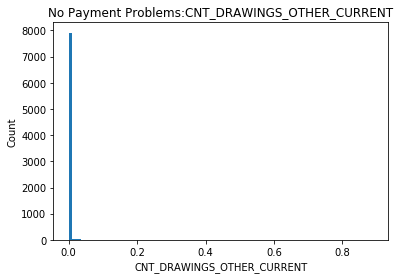

In [370]:
hist_maker(100, success1['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'No Payment Problems:CNT_DRAWINGS_OTHER_CURRENT')

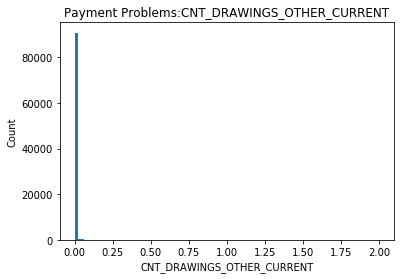

In [371]:
hist_maker(100, success0['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'Payment Problems:CNT_DRAWINGS_OTHER_CURRENT')

In [372]:
#The next column we will look at is AMT_DRAWINGS_OTHER_CURRENT
df_train['AMT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

80334

In [374]:
df_train['AMT_DRAWINGS_OTHER_CURRENT'] = df_train['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_OTHER_CURRENT'] = success1['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_OTHER_CURRENT'] = success0['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)

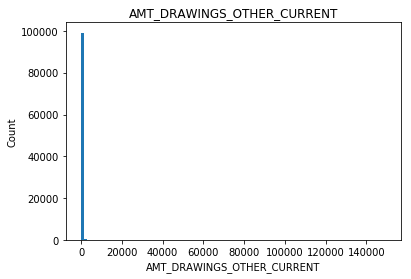

In [375]:
hist_maker(100, df_train['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT')

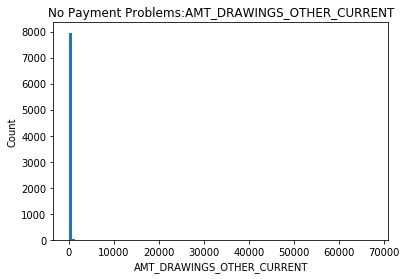

In [376]:
hist_maker(100, success1['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'No Payment Problems:AMT_DRAWINGS_OTHER_CURRENT')

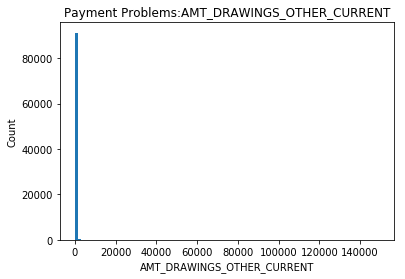

In [377]:
hist_maker(100, success0['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'Payment Problems:AMT_DRAWINGS_OTHER_CURRENT')

In [378]:
#The least column we will look at is AMT_PAYMENT_CURRENT
#This column indicates the current payment amount
df_train['AMT_PAYMENT_CURRENT'].isnull().sum()

80356

In [379]:
df_train['AMT_PAYMENT_CURRENT'] = df_train['AMT_PAYMENT_CURRENT'].fillna(0)
success1['AMT_PAYMENT_CURRENT'] = success1['AMT_PAYMENT_CURRENT'].fillna(0)
success0['AMT_PAYMENT_CURRENT'] = success0['AMT_PAYMENT_CURRENT'].fillna(0)

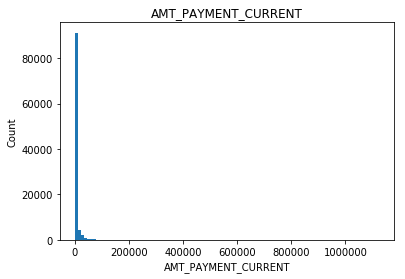

In [380]:
hist_maker(100, df_train['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_CURRENT')

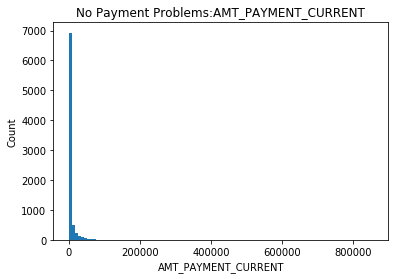

In [381]:
hist_maker(100, success1['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'No Payment Problems:AMT_PAYMENT_CURRENT')

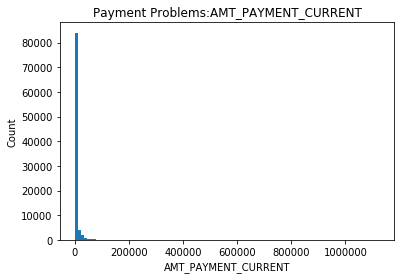

In [382]:
hist_maker(100, success0['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'Payment Problems:AMT_PAYMENT_CURRENT')

In [383]:
df_train.isnull().sum()

SK_ID_CURR                                               0
SK_ID_BUREAU                                         14246
TARGET                                                   0
EXT_SOURCE_3                                             0
EXT_SOURCE_2                                             0
EXT_SOURCE_1                                             0
DAYS_BIRTH                                               0
NAME_EDUCATION_TYPE_Higher education                     0
CNT_DRAWINGS_ATM_CURRENT_x                               0
CNT_DRAWINGS_ATM_CURRENT_y                               0
AMT_DRAWINGS_CURRENT                                     0
AMT_BALANCE                                              0
AMT_RECIVABLE                                            0
AMT_RECEIVABLE_PRINCIPAL                                 0
NAME_INCOME_TYPE_Working                                 0
FLOORSMAX_AVG                                            0
FLOORSMAX_MEDI                                          